# Сборный Проект — 2. HR-аналитика

# Описание проекта
HR-аналитики компании «Работа с заботой» помогают бизнесу оптимизировать управление персоналом: бизнес предоставляет данные, а аналитики предлагают, как избежать финансовых потерь и оттока сотрудников. В этом HR-аналитикам пригодится машинное обучение, с помощью которого получится быстрее и точнее отвечать на вопросы бизнеса.

Компания предоставила данные с характеристиками сотрудников компании. Среди них — уровень удовлетворённости сотрудника работой в компании. Эту информацию получили из форм обратной связи: сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. 

Собирать данные такими опросниками не так легко: компания большая, и всех сотрудников надо сначала оповестить об опросе, а затем проследить, что все его прошли. 

У вас будет несколько задач. Первая — построить модель, которая сможет предсказать уровень удовлетворённости сотрудника на основе данных 
заказчика. 

Почему бизнесу это важно: удовлетворённость работой напрямую влияет на отток сотрудников. А предсказание оттока — одна из важнейших задач HR-аналитиков. Внезапные увольнения несут в себе риски для компании, особенно если уходит важный сотрудник.

Ваша вторая задача — построить модель, которая сможет на основе данных заказчика предсказать то, что сотрудник уволится из компании.

# Описание данных:
Заказчик предоставил данные со следующими признаками:
* `id` — уникальный идентификатор сотрудника;
* `dept` — отдел, в котором работает сотрудник;
* `level` — уровень занимаемой должности;
* `workload` — уровень загруженности сотрудника;
* `employment_years` — длительность работы в компании (в годах);
* `last_year_promo` — показывает, было ли повышение за последний год;
* `last_year_violations` — показывает, нарушал ли сотрудник трудовой договор за последний год;
* `supervisor_evaluation` — оценка качества работы сотрудника, которую дал руководитель;
* `salary` — ежемесячная зарплата сотрудника;
* `job_satisfaction_rate` — уровень удовлетворённости сотрудника работой в компании, целевой признак задачи регрессии.
* `quit` — увольнение сотрудника из компании, целевой признак задачи классификации.

<a id="point0"></a>
# Оглавление
<ul class="toc-item"><li><span><a href="#Задача-регрессии:-предсказание-уровня-удовлетворённости-сотрудника" data-toc-modified-id="Задача-регрессии:-предсказание-уровня-удовлетворённости-сотрудника-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задача регрессии: предсказание уровня удовлетворённости сотрудника</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Изучение данных</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span><ul class="toc-item"><li><span><a href="#Обработка-неявных-дубликатов" data-toc-modified-id="Обработка-неявных-дубликатов-1.2.4.1"><span class="toc-item-num">1.2.4.1&nbsp;&nbsp;</span>Обработка неявных дубликатов</a></span></li><li><span><a href="#Обработка-явных-дубликатов" data-toc-modified-id="Обработка-явных-дубликатов-1.2.4.2"><span class="toc-item-num">1.2.4.2&nbsp;&nbsp;</span>Обработка явных дубликатов</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-непрерывных-числовых-признаков" data-toc-modified-id="Анализ-непрерывных-числовых-признаков-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Анализ непрерывных числовых признаков</a></span><ul class="toc-item"><li><span><a href="#Признак-salary" data-toc-modified-id="Признак-salary-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Признак <code>salary</code></a></span></li><li><span><a href="#Признак-job_satisfaction_rate" data-toc-modified-id="Признак-job_satisfaction_rate-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Признак <code>job_satisfaction_rate</code></a></span></li></ul></li><li><span><a href="#Анализ-дискретных-числовых-и-категориальных-признаков" data-toc-modified-id="Анализ-дискретных-числовых-и-категориальных-признаков-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Анализ дискретных числовых и категориальных признаков</a></span><ul class="toc-item"><li><span><a href="#Признак-dept" data-toc-modified-id="Признак-dept-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Признак <code>dept</code></a></span></li><li><span><a href="#Признак-level" data-toc-modified-id="Признак-level-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Признак <code>level</code></a></span></li><li><span><a href="#Признак-workload" data-toc-modified-id="Признак-workload-1.3.2.3"><span class="toc-item-num">1.3.2.3&nbsp;&nbsp;</span>Признак <code>workload</code></a></span></li><li><span><a href="#Признак-employment_years" data-toc-modified-id="Признак-employment_years-1.3.2.4"><span class="toc-item-num">1.3.2.4&nbsp;&nbsp;</span>Признак <code>employment_years</code></a></span></li><li><span><a href="#Признак-last_year_promo" data-toc-modified-id="Признак-last_year_promo-1.3.2.5"><span class="toc-item-num">1.3.2.5&nbsp;&nbsp;</span>Признак <code>last_year_promo</code></a></span></li><li><span><a href="#Признак-last_year_violations" data-toc-modified-id="Признак-last_year_violations-1.3.2.6"><span class="toc-item-num">1.3.2.6&nbsp;&nbsp;</span>Признак <code>last_year_violations</code></a></span></li><li><span><a href="#Признак-supervisor_evaluation" data-toc-modified-id="Признак-supervisor_evaluation-1.3.2.7"><span class="toc-item-num">1.3.2.7&nbsp;&nbsp;</span>Признак <code>supervisor_evaluation</code></a></span></li></ul></li></ul></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Создание-пайплайна" data-toc-modified-id="Создание-пайплайна-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Создание пайплайна</a></span></li><li><span><a href="#Поиск-лучшей-модели" data-toc-modified-id="Поиск-лучшей-модели-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Поиск лучшей модели</a></span></li><li><span><a href="#Оценка-качества-модели-на-тестовых-данных" data-toc-modified-id="Оценка-качества-модели-на-тестовых-данных-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Оценка качества модели на тестовых данных</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Задача-регрессии:-выводы" data-toc-modified-id="Задача-регрессии:-выводы-1.6.5"><span class="toc-item-num">1.6.5&nbsp;&nbsp;</span>Задача регрессии: выводы</a></span></li></ul></li></ul></li><li><span><a href="#Задача-классификации:-предсказание-увольнения-сотрудника-из-компании" data-toc-modified-id="Задача-классификации:-предсказание-увольнения-сотрудника-из-компании-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Задача классификации: предсказание увольнения сотрудника из компании</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Изучение данных</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Обработка дубликатов</a></span><ul class="toc-item"><li><span><a href="#Обработка-неявных-дубликатов" data-toc-modified-id="Обработка-неявных-дубликатов-2.2.4.1"><span class="toc-item-num">2.2.4.1&nbsp;&nbsp;</span>Обработка неявных дубликатов</a></span></li><li><span><a href="#Обработка-явных-дубликатов" data-toc-modified-id="Обработка-явных-дубликатов-2.2.4.2"><span class="toc-item-num">2.2.4.2&nbsp;&nbsp;</span>Обработка явных дубликатов</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-непрерывных-числовых-признаков" data-toc-modified-id="Анализ-непрерывных-числовых-признаков-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Анализ непрерывных числовых признаков</a></span><ul class="toc-item"><li><span><a href="#Признак-salary" data-toc-modified-id="Признак-salary-2.3.1.1"><span class="toc-item-num">2.3.1.1&nbsp;&nbsp;</span>Признак <code>salary</code></a></span></li></ul></li><li><span><a href="#Анализ-дискретных-числовых-и-категориальных-признаков" data-toc-modified-id="Анализ-дискретных-числовых-и-категориальных-признаков-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Анализ дискретных числовых и категориальных признаков</a></span><ul class="toc-item"><li><span><a href="#Признак-dept" data-toc-modified-id="Признак-dept-2.3.2.1"><span class="toc-item-num">2.3.2.1&nbsp;&nbsp;</span>Признак <code>dept</code></a></span></li><li><span><a href="#Признак-level" data-toc-modified-id="Признак-level-2.3.2.2"><span class="toc-item-num">2.3.2.2&nbsp;&nbsp;</span>Признак <code>level</code></a></span></li><li><span><a href="#Признак-workload" data-toc-modified-id="Признак-workload-2.3.2.3"><span class="toc-item-num">2.3.2.3&nbsp;&nbsp;</span>Признак <code>workload</code></a></span></li><li><span><a href="#Признак-employment_years" data-toc-modified-id="Признак-employment_years-2.3.2.4"><span class="toc-item-num">2.3.2.4&nbsp;&nbsp;</span>Признак <code>employment_years</code></a></span></li><li><span><a href="#Признак-last_year_promo" data-toc-modified-id="Признак-last_year_promo-2.3.2.5"><span class="toc-item-num">2.3.2.5&nbsp;&nbsp;</span>Признак <code>last_year_promo</code></a></span></li><li><span><a href="#Признак-last_year_violations" data-toc-modified-id="Признак-last_year_violations-2.3.2.6"><span class="toc-item-num">2.3.2.6&nbsp;&nbsp;</span>Признак <code>last_year_violations</code></a></span></li><li><span><a href="#Признак-supervisor_evaluation" data-toc-modified-id="Признак-supervisor_evaluation-2.3.2.7"><span class="toc-item-num">2.3.2.7&nbsp;&nbsp;</span>Признак <code>supervisor_evaluation</code></a></span></li><li><span><a href="#Признак-quit" data-toc-modified-id="Признак-quit-2.3.2.8"><span class="toc-item-num">2.3.2.8&nbsp;&nbsp;</span>Признак <code>quit</code></a></span></li></ul></li><li><span><a href="#Портрет-типичного-«уволившегося-сотрудника»" data-toc-modified-id="Портрет-типичного-«уволившегося-сотрудника»-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Портрет типичного «уволившегося сотрудника»</a></span></li><li><span><a href="#Анализ-взаимозависимости-признаков-job_satisfaction_rate-и-quit" data-toc-modified-id="Анализ-взаимозависимости-признаков-job_satisfaction_rate-и-quit-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Анализ взаимозависимости признаков <code>job_satisfaction_rate</code> и <code>quit</code></a></span></li></ul></li><li><span><a href="#Добавление-нового-входного-признака" data-toc-modified-id="Добавление-нового-входного-признака-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Добавление нового входного признака</a></span></li><li><span><a href="#Корреляционный-анализ" data-toc-modified-id="Корреляционный-анализ-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Корреляционный анализ</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Создание-пайплайна" data-toc-modified-id="Создание-пайплайна-2.7.1"><span class="toc-item-num">2.7.1&nbsp;&nbsp;</span>Создание пайплайна</a></span></li><li><span><a href="#Поиск-лучшей-модели" data-toc-modified-id="Поиск-лучшей-модели-2.7.2"><span class="toc-item-num">2.7.2&nbsp;&nbsp;</span>Поиск лучшей модели</a></span></li><li><span><a href="#Оценка-качества-модели-на-тестовых-данных" data-toc-modified-id="Оценка-качества-модели-на-тестовых-данных-2.7.3"><span class="toc-item-num">2.7.3&nbsp;&nbsp;</span>Оценка качества модели на тестовых данных</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-2.7.4"><span class="toc-item-num">2.7.4&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Задача-регрессии:-выводы" data-toc-modified-id="Задача-регрессии:-выводы-2.7.5"><span class="toc-item-num">2.7.5&nbsp;&nbsp;</span>Задача регрессии: выводы</a></span></li></ul></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li></ul></li><li><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></li></ul>

## Задача регрессии: предсказание уровня удовлетворённости сотрудника

### Загрузка и изучение данных
Импорт необходимых для выполнения проекта библиотек:

In [1]:
!pip install scikit-learn==1.3.2 -q
!pip install phik -q
!pip install shap -q

In [2]:
import pandas as pd              # Импорт библиотеки pandas
import matplotlib.pyplot as plt  # Импорт библиотеки для работы с графиками
import numpy as np               # Импорт библиотеки NumPy
from scipy import stats          # Импорт статистических функций из библиотеки SciPy
from phik import phik_matrix     # Импорт функции матрицы корреляции Фи
from phik.report import plot_correlation_matrix # Импорт функции отображения матрицы корреляции

from sklearn.pipeline import Pipeline # Импорт Pipeline

from sklearn.preprocessing import (OneHotEncoder,  # Кодировщик OneHotEncoder
                                   OrdinalEncoder, # Кодировщик OrdinalEncoder
                                   StandardScaler, # Масштабирование: стандартизация
                                   MinMaxScaler,   # Масштабирование: нормализация
                                   LabelEncoder)   # Кодировщик LabelEncoder 

from sklearn.impute import SimpleImputer # Импорт инструмента обработки пропусков
from sklearn.compose import ColumnTransformer # Импорт инструмента подготовки данных
from sklearn.model_selection import GridSearchCV # Импорт инструмента автоматизированного поиска гиперпараметров
from sklearn.metrics import make_scorer # Импорт функции для оценки качества моделей
from sklearn.metrics import roc_auc_score # Импорт метрики ROC-AUC

# Импорт моделей машинного обучения:
from sklearn.linear_model import LinearRegression, LogisticRegression # Линейные модели
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier # Дерево решений
from sklearn.svm import SVR, SVC # Метод опорных векторов
from sklearn.neighbors import KNeighborsClassifier  # Метод k-ближайших соседей
from sklearn.dummy import DummyRegressor, DummyClassifier # Модель Dummy

import shap # Импорт инструмента оценки значимости признаков SHAP

Установка вспомогательных настроек, функций и констант:

In [3]:
# формат вывода float-чисел датафрейма:
pd.options.display.float_format = ("{:.2f}".format)

# настройка отображения графиков:
plt.rcParams["figure.figsize"] = (15,7) # размер графиков по умолчанию:
plt.rcParams.update({'axes.grid' : True, 'grid.alpha': 0.33, 'grid.linestyle': '--'}) # отображение сетки:

# установка цветовой палитры:
color_list = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
               '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# переменные для форматирования шрифта при выводе информации:
green, red, blue, pink, black, bold, end = '\33[92m', '\33[91m', '\33[36m', '\33[95m','\33[7m', '\33[1m','\33[0m'

# создание переменной псевдослучайности
RANDOM_STATE = 42

def dataset_info(df):
    """
    Функция для вывода общей информации о датасете
    """
    print('• ' + '\33[4m' + 'Первые 10 строк датасета:' + end, f'[{df.dsc}]')
    display(df.head(10))
    print('• ' + '\33[4m' + 'Основная информация о датасете:' + end, f'[{df.dsc}]')
    df.info()

def is_that_snake(list_of_strings):
    """
    Данная функция получает на входе список со строковыми значениями (например, список заголовков датафрейма)
    и поочередно проверяет наличие НЕжелательных для оформления символов.
    Желательные символы: английский алфавит в нижнем регистре, нижнее подчеркивание и цифры от 0 до 9
    """
    snake_symbols, bad_list = list('abcdefghijklmnopqrstuvwxyz_0123456789'), []
    for i in list_of_strings:
        if set(i).issubset(snake_symbols): # проверка, что все элементы подмножества i
            pass                           # принадлежат множеству snake_symbols
        else: bad_list.append(i)
    return f'(!) Следует обратить внимание: {bad_list}' if bad_list else '✅ Проблем не обнаружено'

def stat_num(data_set, feature, rv=2, bins=50):
    """
    Функция отображения распределения числового признака.
    Для непрерывных величин строится диаграммы размаха и гистограммы распредления.
    Выводится описательная информация.
    """
    param = data_set[feature]
    dsr = param.describe()
    iqr = dsr['75%'] - dsr['25%']
    
    kde = stats.gaussian_kde(param)
    xx = np.linspace(dsr['min'], dsr['max'], bins)
    
    # конфигурация графиков:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    # диаграмма размаха:
    param.plot(kind='box', ax=axes[0])
    axes[0].set_title('Разброс значений признака')
    axes[0].set_ylabel(feature_dsc[feature])
    
    # гистограмма:
    bns =  plt.hist(param, bins=bins, orientation='horizontal')
    scale = max(bns[0]) / max(kde(xx))
    # масштабированная линия плотности:
    plt.plot(0.9 * scale * kde(xx), xx)
    axes[1].set_title('Гистограмма распределения')
    axes[1].set_xlabel('Частота')
    axes[1].axhline(dsr['mean'], color='r', linestyle='--', label='Среднее значение')
    axes[1].axhline(dsr['50%'], color='r', linestyle=':', label='Медиана')
    axes[1].legend()
    plt.show()
    
    # описательная информация:
    print(f"Описательная информация для признака '{feature}':")
    print(bold + "Минимальное значение:" + end, 
          round(dsr['min'], 2), bold + "\t|\tМаксимальное значение:" + end, round(dsr['max'], 2))
    print(bold + "Среднее значение:" + end, f"{round(dsr['mean'], rv)}")
    print(bold + "Медиана:" + end, round(dsr['50%'], 2))
    print(bold + "Межквартильный размах IQR:" + end, round(iqr, rv))
    print(bold + "Границы нормальных значений:" + end, 
          f"от {round(max([dsr['25%'] - 1.5*iqr, dsr['min']]), rv)} до",
          f"{round(min([dsr['75%'] + 1.5*iqr, dsr['max']]), rv)}")
    
def stat_cat(data_set, param, labels=False):
    """
    Функция анализа распределения категориальных 
    или дискретных числовых признаков
    """
    data_set_plt = data_set[param].value_counts().sort_values()
    
    if labels:
        pass
    else:
        labels = data_set[param].value_counts().sort_values().index

    # конфигурация графиков:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    
    # столбчатый график:
    data_set_plt.plot(kind='barh', color=color_list, ax=axes[0])
    axes[0].set_title('Абсолютное распределение')
    axes[0].set_ylabel(feature_dsc[param])
    axes[0].set_xlabel('Частота')
    axes[0].set_yticklabels(labels)
    
    # круговая диаграмма:
    data_set_plt.plot(kind='pie', autopct='%1.1f%%', ax=axes[1], labels=labels)
    axes[1].set_title('Относительное распределение')
    axes[1].yaxis.set_visible(False)
    
    plt.suptitle('Распределение значений признаков')
    plt.show()
    
    # описательная информация:
    print(f"Значения признака '{param}' распределены следующим образом:")
    print(bold + "- Всего значений:" + end, len(data_set))
    print(bold + "- Уникальных значений:" + end, len(data_set[param].dropna().unique()), 
          data_set[param].dropna().unique())
    print("В том числе:")
    for el in data_set[param].dropna().unique():
        print(bold + f"- {el}:" + end, len(data_set[data_set[param] == el]), 
              f"({round(100*len(data_set[data_set[param] == el])/len(data_set), 2)}%)")

def find_peak(x, y, limit, t):
    """
    Функция находит пик (min/max) для заданного интервала для набора x,y
    """
    (l_min, l_max) = limit
    pairs = list(zip(x, y))
    if t == 'max':
        res_x, res_y = max(filter(lambda pair: l_min <= pair[0] <= l_max, pairs), key=lambda pair: pair[1])
    else:
        res_x, res_y = min(filter(lambda pair: l_min <= pair[0] <= l_max, pairs), key=lambda pair: pair[1])
    return (res_x, res_y)

def phi_heatmap(phik_overview):
    """
    Функция для отрисовки тепловой карты phik матрицы
    """
    plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Oranges',
    title=r'Матрица корреляции $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
    )
    plt.grid(visible=False)
    plt.show()
    
def models_compare(best_scores, pred_type):
    """
    Функция для графического сравнения параметров
    mean_test_score, mean_fit_time
    """
    if pred_type == 'reg':
        metric = '$SMAPE$, %'
        xlim = None
        wspace=0.02
    if pred_type == 'clf':
        metric = '$ROC-AUC$'
        xlim = (0.915,0.935)
        wspace=0.07
            
    fig, axes = plt.subplots(nrows=1, ncols=2)
    best_scores['mean_test_score'].plot(kind='barh', ax=axes[0], color=color_list)
    axes[0].set_title('Средняя метрика при кросс-валидации')
    axes[0].set_yticklabels([i for i in best_scores['param_models']])
    axes[0].set_xlabel(f'Значение метрики {metric}')
    axes[0].set_ylabel('Наименование модели')
    axes[0].set_xlim(xlim)
    
    best_scores['mean_fit_time'].plot(kind='barh', ax=axes[1], color=color_list)
    axes[1].set_title('Среднее время обучения модели')
    axes[1].set_yticklabels([])
    axes[1].set_xlabel('Среднее время обучения модели на выбранных гиперпараметрах' + \
                       '\nна всех блоках при кросс-валидации, секунд')
    plt.suptitle('Сравнение лучших параметров исследуемых моделей')
    fig.subplots_adjust(wspace=wspace)
    plt.show()
    
    id_1, id_2 = best_scores.index[0], best_scores.index[1]
    metric_1, metric_2 = best_scores['mean_test_score'].loc[id_1], best_scores['mean_test_score'].loc[id_2]
    time_1, time_2 = best_scores['mean_fit_time'].loc[id_1], best_scores['mean_fit_time'].loc[id_2]

    print(f"Метрика лучшей модели {best_scores['param_models'].loc[id_1]} ({metric_1:.2f})",
      f"на {abs(100-metric_2*100/metric_1):.2f}% лучше метрики",
      f"модели {best_scores['param_models'].loc[id_2]} ({metric_2:.2f})")
    
    print(f"Среднее время на обучение модели {best_scores['param_models'].loc[id_1]} ({time_1:.3f})",
      f"в {time_1/time_2:.0f} раз больше",
      f"модели {best_scores['param_models'].loc[id_2]} ({time_2:.3f})")

def compare_cat(data_set, feature):
    """
    Функция для сравнения распределения категориальных признаков
    в зависимости от значения целевого признака
    """
    pt = pd.pivot_table(data_set, index=feature, columns='quit', aggfunc='size', fill_value=0)
    pt['rate'] = round(100 * pt['yes'] / pt['no'], 2)
    
    pt.drop('rate', axis=1).plot(kind='bar', color=color_list, rot=0)
    
    for i,v in enumerate(pt['yes']):
        plt.text(i+0.025,v, f"{pt['rate'].iloc[i]:.2f}%", ha="left", va='bottom')
    
    plt.xlabel(feature_dsc[feature])
    plt.ylabel("Частота")
    plt.title(f"Распределение признака '{feature}' в зависимости от факта увольнения сотрудника из компании")
    plt.show()
    
def compare_num(data_set, feature):
    """
    Функция для сравнения распределения числовых непрерывных признаков
    в зависимости от значения целевого признака
    """
    # Считаем данные для quit=no
    quit_no = data_set[data_set['quit'] == 'no'][feature]
    kde_no = stats.gaussian_kde(quit_no)
    x_no = np.linspace(min(quit_no), max(quit_no), 1000)
    y_no = kde_no(x_no)
        
    # Считаем данные для quit=yes
    quit_yes = data_set[data_set['quit'] == 'yes'][feature]
    kde_yes = stats.gaussian_kde(quit_yes)
    x_yes = np.linspace(min(quit_yes), max(quit_yes), 1000)
    y_yes = kde_yes(x_yes)
    
    # Построение графиков
    plt.plot(x_no, y_no, label="Не уволились", color=color_list[0], linewidth=3)
    peak_1 = find_peak(x_no,y_no,(x_no.min(),x_no.max()), 'max')[0]
    plt.axvline(peak_1, color=color_list[0], linestyle=':', label=f"{feature}={peak_1:.1f}")
    
    plt.plot(x_yes, y_yes, label="Уволились", color=color_list[1], linewidth=3)
    peak_2 = find_peak(x_yes,y_yes,(x_yes.min(),x_yes.max()), 'max')[0]
    plt.axvline(peak_2, color=color_list[1], linestyle=':', label=f"{feature}={peak_2:.1f}")
    
    plt.legend()
    plt.xlabel(feature_dsc[feature])
    plt.ylabel('Плотность значений')
    plt.title(f"Распределение плотности значений признака '{feature}'" + 
              "\n в зависимости от факта увольнения сотрудника из компании")
    plt.show()

#### Загрузка данных
Загрузим данные в датафреймы:

In [4]:
job_satisfaction_rate_train       = pd.read_csv('/datasets/train_job_satisfaction_rate.csv')
features_test                     = pd.read_csv('/datasets/test_features.csv')
job_satisfaction_rate_target_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')

[Вернуться к оглавлению](#point0)

#### Изучение данных
Для удобства и наглядности информации зададим имеющимся датасетам свойства с именами:

In [5]:
job_satisfaction_rate_train.dsc       = 'job_satisfaction_rate_train'
features_test.dsc                     = 'features_test'
job_satisfaction_rate_target_test.dsc = 'job_satisfaction_rate_target_test'

Выведем общую информацию об имеющихся датасетах:

In [6]:
for d in [job_satisfaction_rate_train, features_test, job_satisfaction_rate_target_test]:
    dataset_info(d)
    print('\n' + '- '*50 + '\n')

len_train, len_test = job_satisfaction_rate_train.shape[0], features_test.shape[0]
print("Выборки поделены в пропорциях:",
      '\33[43m' + f"[train: {100*len_train / (len_train+len_test):.2f}%]" + end + ',',
      '\33[45m' + f"[test: {100*len_test / (len_train+len_test):.2f}%]")

• Первые 10 строк датасета: [job_satisfaction_rate_train]


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20
5,405448,hr,middle,low,7,no,no,4,30000,0.78
6,857135,sales,sinior,medium,9,no,no,3,56400,0.56
7,400657,purchasing,middle,high,9,no,no,3,52800,0.44
8,198846,hr,junior,low,1,no,no,2,13200,0.14
9,149797,technology,middle,high,6,no,no,3,54000,0.47


• Основная информация о датасете: [job_satisfaction_rate_train]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

• Первые 10 строк датасета: [features_

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
5,429973,purchasing,middle,medium,6,no,no,3,42000
6,850699,technology,junior,medium,3,no,no,3,26400
7,500791,sales,middle,high,9,no,no,4,49200
8,767867,marketing,middle,high,3,no,yes,4,62400
9,937235,sales,junior,medium,1,no,yes,3,26400


• Основная информация о датасете: [features_test]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

• Первые 10 строк датасета: [job_satisfaction_rate_target_test]


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08
5,817219,0.76
6,269033,0.64
7,962356,0.38
8,649052,0.14
9,532834,0.59


• Основная информация о датасете: [job_satisfaction_rate_target_test]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Выборки поделены в пропорциях: [train: 66.67%], [test: 33.33%]


**Выводы**:
* Датасет `job_satisfaction_rate_train`:
  * Состоит из 10 столбцов и 4000 строк.
  * Содержит обучающие и целевой признаки тренировочных данных.
  * Наименования столбцов соответствуют описанию.
  * Содержит пропуски среди обучающих признаков.
* Датасет `features_test`:
  * Состоит из 9 столбцов и 2000 строк.
  * Содержит обучающий признак тестовых данных.
  * Наименования столбцов соответствуют описанию.
  * Содержит пропуски среди обучающих признаков.
* Датасет `job_satisfaction_rate_target_test`:
  * Состоит из 2 столбцов и 2000 строк.
  * Содержит целевой признак тестовых данных.
  * Наименования столбцов соответствуют описанию.
  * Не содержит пропусков.
* Выборки поделены в пропорциях: <span style="border-width:2px; border-style:solid; border-color:#ddb62b; padding: 3px;">66.67% {обучающая}</span> + <span style="border-width:2px; border-style:solid; border-color:#d160c4; padding: 3px;">33.33% {тестовая}</span>
* Имеющиеся данные соответствуют описанию и структуре, заявленным заказчиком.
* Значения ячеек выглядят реалистично.
* Значения ячеек выглядят уникально.
* Заголовки столбцов датасетов выглядят соответствующими стандарту оформления данных.

[Вернуться к оглавлению](#point0)

### Предобработка данных
#### Переименование столбцов
Отобразим заголовки столбцов для наших данных:

In [7]:
print("Списки заголовков датасетов:")
for d in [job_satisfaction_rate_train, features_test, job_satisfaction_rate_target_test]:
    print('• '+ bold + d.dsc + end, d.columns.to_list())
    print()

Списки заголовков датасетов:
• job_satisfaction_rate_train ['id', 'dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

• features_test ['id', 'dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'salary']

• job_satisfaction_rate_target_test ['id', 'job_satisfaction_rate']



Заголовки датафреймов выглядят соответствующими стандарту. 

Используя вспомогательную функцию, можно убедиться, что в заголовках отсутствуют нежелательные символы:

In [8]:
for df in [job_satisfaction_rate_train, features_test, job_satisfaction_rate_target_test]:
    print(bold + df.dsc + end + ':', is_that_snake(df.columns))

job_satisfaction_rate_train: ✅ Проблем не обнаружено
features_test: ✅ Проблем не обнаружено
job_satisfaction_rate_target_test: ✅ Проблем не обнаружено


**Вывод**: убедились, что заголовки датасетов соответствуют стандарту оформления данных.

[Вернуться к оглавлению](#point0)

#### Обработка пропусков
На этапе первичного ознакомления с данными в данных были замечены пропуски. 

Рассмотрим подробно:

In [9]:
print("Суммарное количество пропусков в датасетах:")
for d in [job_satisfaction_rate_train, features_test, job_satisfaction_rate_target_test]:
    print(f'• {d.dsc}: {d.isna().sum().sum()}') 

Суммарное количество пропусков в датасетах:
• job_satisfaction_rate_train: 10
• features_test: 3
• job_satisfaction_rate_target_test: 0


В датасете `job_satisfaction_rate_train` содержится 10 пропусков, в `features_test` - 3.

Отобразим строки с пропусками:

In [10]:
for d in [job_satisfaction_rate_train, features_test]:
    display(d[d.isna().any(axis=1)].style.set_caption(f"Датасет '{d.dsc}':").highlight_null())

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,nan,medium,1,no,no,4,27600,0.660000
1469,416327,sales,nan,low,1,no,no,5,18000,0.730000
1526,694746,nan,junior,medium,5,no,no,4,21600,0.620000
1630,814624,nan,junior,medium,3,no,no,4,24000,0.880000
1633,475114,nan,junior,high,4,no,no,4,31200,0.630000
1745,135043,sales,nan,medium,1,no,no,3,26400,0.300000
2522,998838,sales,nan,medium,1,no,no,5,27600,0.710000
2781,497243,nan,junior,medium,1,no,no,3,26400,0.280000
2975,168668,nan,junior,low,3,no,no,4,18000,0.880000
3866,641150,nan,junior,low,3,no,yes,4,12000,0.540000


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,nan,junior,medium,1,no,no,1,20400
312,471990,sales,nan,low,1,no,no,3,12000
1196,832342,nan,junior,medium,1,no,no,4,28800


**Выводы**:
* Датасеты `job_satisfaction_rate_train` и `features_test` содержат пропуски данных.
* Всего 13 пропусков. Из них:
  * `job_satisfaction_rate_train` содержит 10, 
  * `features_test` - 3 пропуска.
* Пропуски наблюдаются в *категориальных* признаках: `dept` (отдел, в котором работает сотрудник) и `level` (уровень занимаемой должности).
* Количество пропусков относительно небольшое:
  * 10 пропусков для `job_satisfaction_rate_train` составляет 0.25% от всей выборки,
  * 3 пропуска для `features_test` - 0.15%.
* Заполнение пропусков будет осуществлено в пайплане на этапе подготовки данных.

[Вернуться к оглавлению](#point0)

#### Изменение типов данных
Для имеющихся датасетов отобразим 1 произвольную строку с данными, а также строку с указанием типов данных:

In [11]:
for d in [job_satisfaction_rate_train, features_test, job_satisfaction_rate_target_test]:
    display(pd.concat([d.sample(), 
    pd.DataFrame(d.dtypes, columns=['dtypes']).transpose()]).style.set_caption(f"Датасет '{d.dsc}':"))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
207,337679,hr,junior,medium,2,no,no,3,25200,0.360000
dtypes,int64,object,object,object,int64,object,object,int64,int64,float64


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
548,815744,hr,middle,medium,4,no,yes,3,43200
dtypes,int64,object,object,object,int64,object,object,int64,int64


,id,job_satisfaction_rate
1974,493723,0.570000
dtypes,int64,float64


**Вывод**: типы данных признаков не требуют изменений.

[Вернуться к оглавлению](#point0)

#### Обработка дубликатов
##### Обработка неявных дубликатов
Перед тем как искать полные дубликаты, проверим насколько уникальны значения в строковых признаках. 

Отобразим уникальные значения таких признаков:

In [12]:
for d in [job_satisfaction_rate_train, features_test]:
    print(bold + d.dsc + end + ':')
    for c in d.columns:
        if d[c].dtype == 'object':
            print(f'• {c}: {list(d[c].unique())}')
    print()

job_satisfaction_rate_train:
• dept: ['sales', 'hr', 'technology', 'purchasing', 'marketing', nan]
• level: ['junior', 'middle', 'sinior', nan]
• workload: ['medium', 'high', 'low']
• last_year_promo: ['no', 'yes']
• last_year_violations: ['no', 'yes']

features_test:
• dept: ['marketing', 'hr', 'sales', 'purchasing', 'technology', nan, ' ']
• level: ['junior', 'middle', 'sinior', nan]
• workload: ['medium', 'low', 'high', ' ']
• last_year_promo: ['no', 'yes']
• last_year_violations: ['no', 'yes']



Можно заметить, что в датасете `features_test` среди уникальных значений признаков `dept` и `workload` присутсвует значение `' '`. 

Отобразим такие строки:

In [13]:
(features_test[(features_test['dept'] == ' ') | (features_test['workload'] == ' ')]
         .style.applymap(lambda x: 'background-color: orange' if x == ' ' else ''))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
15,590867,marketing,junior,,4,no,no,4,28800
1699,822186,,middle,medium,3,no,no,4,38400


Имеется одна строка где значение признака `dept` указано как `' '` и одна строка `workload` с аналогичным значением. 

Эти значения не иформативные, их нет возможности обработать, поэтому для удобства обработки и подготовки данных преобразуем подобные значения в пропуск.

In [14]:
features_test['dept'] = features_test['dept'].replace(' ', np.nan)
features_test['workload'] = features_test['workload'].replace(' ', np.nan)

Не столь критично, но все же: одно из значений признака `level` - `sinior` указано с ошибкой. Исправим данные:

In [15]:
job_satisfaction_rate_train['level'] = job_satisfaction_rate_train['level'].replace('sinior', 'senior')
features_test['level'] = features_test['level'].replace('sinior', 'senior')

Отобразим еще раз данные:

In [16]:
for d in [job_satisfaction_rate_train, features_test]:
    print(bold + d.dsc + end + ':')
    for c in d.columns:
        if d[c].dtype == 'object':
            print(f'• {c}: {d[c].unique()}')
    print()

job_satisfaction_rate_train:
• dept: ['sales' 'hr' 'technology' 'purchasing' 'marketing' nan]
• level: ['junior' 'middle' 'senior' nan]
• workload: ['medium' 'high' 'low']
• last_year_promo: ['no' 'yes']
• last_year_violations: ['no' 'yes']

features_test:
• dept: ['marketing' 'hr' 'sales' 'purchasing' 'technology' nan]
• level: ['junior' 'middle' 'senior' nan]
• workload: ['medium' 'low' 'high' nan]
• last_year_promo: ['no' 'yes']
• last_year_violations: ['no' 'yes']



**Выводы**:
* Среди признаков `dept` и `workload` датасета `features_test` были обнаружены значения `' '`. Подобные значения были преобразованы в пропуск.
* После преобразования данных еще один признак - `workload` - стал содержать пропуск данных.
  * Все признаки содержащие пропуски - категориальные: `dept`, `level`, `workload`.
  *  Таким образом, всего 15 пропусков. Из них `job_satisfaction_rate_train` содержит 10, `features_test` - 5 пропусков.
* Для признака `level` изменено написание значения: `sinior` --> `senior`

[Вернуться к оглавлению](#point0)

##### Обработка явных дубликатов
Теперь проверим, есть ли явные дубликаты в данных:

In [17]:
print('Количество дублирующихся строк:')
for df in [job_satisfaction_rate_train, features_test, job_satisfaction_rate_target_test]:
    print(f'• {df.dsc}: {df.duplicated().sum()}')

Количество дублирующихся строк:
• job_satisfaction_rate_train: 0
• features_test: 0
• job_satisfaction_rate_target_test: 0


Полные дубликаты строк отсутствуют.

Убедимся, что в рассматриваемых датасетах отсутствуют дубликаты в `id`:

In [18]:
(job_satisfaction_rate_train.duplicated(subset=['id']).sum(), features_test.duplicated(subset=['id']).sum(), 
 job_satisfaction_rate_target_test.duplicated(subset=['id']).sum())

(0, 0, 0)

Поскольку в рассматриваемых датасетах все значения `id` уникальны - установим их в качестве индексов:

In [19]:
job_satisfaction_rate_train.set_index('id', inplace=True)
features_test.set_index('id', inplace=True)
job_satisfaction_rate_target_test.set_index('id', inplace=True)

Убедимся, что датасеты с тестовыми данными `features_test` и `job_satisfaction_rate_target_test` имеют одинаковый набор `id`:

In [20]:
set(features_test.index) == set(job_satisfaction_rate_target_test.index)

True

Проверим, что обучающие и тестовые признаки не имеют общих `id`:

In [21]:
set(job_satisfaction_rate_train.index).isdisjoint(set(features_test.index))

True

**Выводы**:
* В датасетах `job_satisfaction_rate_train`, `features_test`, `job_satisfaction_rate_target_test` отсутствуют полные дубликаты строк.
* Рассматриваемые датасеты не содержат дубликатов в `id`. Признак `id` установлен в качестве индексов.
* Список значений `id` датасета `features_test` идентичен списку `id` датасета `job_satisfaction_rate_target_test`.
* Обучающий датасет `job_satisfaction_rate_train` и тестовые `features_test`, `job_satisfaction_rate_target_test` не имеют общих элементов среди `id`.

[Вернуться к оглавлению](#point0)

### Исследовательский анализ данных
Для рассматриваемых данных признаки распределены следующим образом:
* **Числовые непрерывные признаки**: `salary`, `job_satisfaction_rate`
* **Числовые дискретные и категориальные признаки**: `dept`, `level`, `workload`, `employment_years`, `last_year_promo`, `last_year_violations`, `supervisor_evaluation`

Хотя признаки `employment_years` и `supervisor_evaluation` и представлены числовыми значениями (`int`), по характеру значений они больше подходят к категориальными данным.

Для более наглядного представления информации я сформирую словарь с описанием признаков.

In [22]:
feature_dsc = {'dept':'Отдел, в котором работает сотрудник',
               'level':'Уровень занимаемой должности',
               'workload':'Уровень загруженности сотрудника',
               'employment_years':'Длительность работы в компании (в годах)',
               'last_year_promo':'Повышение за последний год',
               'last_year_violations':'Нарушение сотрудником трудового договора за последний год',
               'supervisor_evaluation':'Оценка качества работы сотрудника, которую дал руководитель',
               'salary':'Ежемесячная зарплата сотрудника',
               'job_satisfaction_rate':'Уровень удовлетворённости сотрудника работой в компании',
               'quit':'Увольнение сотрудника из компании'
              }

[Вернуться к оглавлению](#point0)

#### Анализ непрерывных числовых признаков
##### Признак `salary`

Признак отображает ежемесячную зарплату сотрудника.

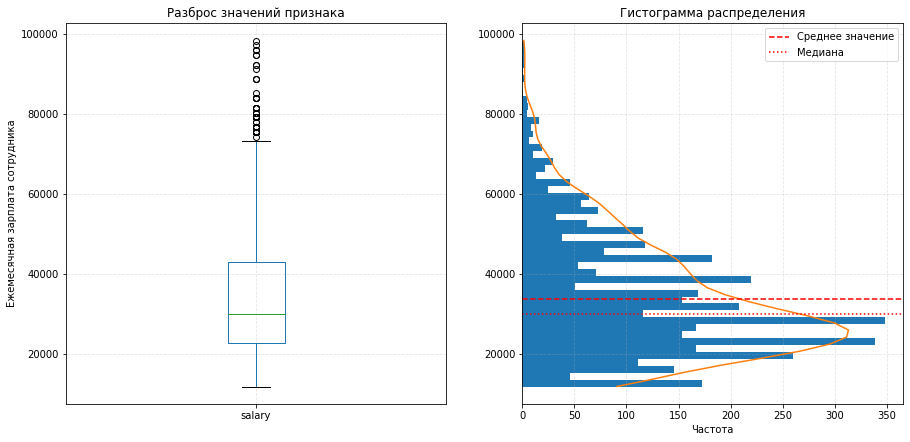

Описательная информация для признака 'salary':
Минимальное значение: 12000.0 	|	Максимальное значение: 98400.0
Среднее значение: 33926.7
Медиана: 30000.0
Межквартильный размах IQR: 20400.0
Границы нормальных значений: от 12000.0 до 73800.0


In [23]:
stat_num(job_satisfaction_rate_train, 'salary')

**Вывод**
* Для признака `salary` не наблюдается явно аномальных значений данных
* Присутствуют данные выходящие за нормальных значений (выше 73800), но эти данные не являются ошибочными.
* Наблюдается ассиметрия в распредлении данных - медиана (30000) находится ближе к нижней границе нормальных значений, которая совпадает с минимальным значением (12000), чем к верхней границе (73800). Частота значений выше среднего - плавно убывает в направлении верхней границы нормальных значений.

[Вернуться к оглавлению](#point0)

##### Признак `job_satisfaction_rate`
Признак отображает уровень удовлетворённости сотрудника работой в компании.  
Это <font color='red'>целевой признак</font>.<br>
Значения распределены от 0 до 1, где:
* 0 — совершенно неудовлетворён, 
* 1 — полностью удовлетворён

Отобразим распределение признака для обучающих и тестовых данных:

Обучающие данные:


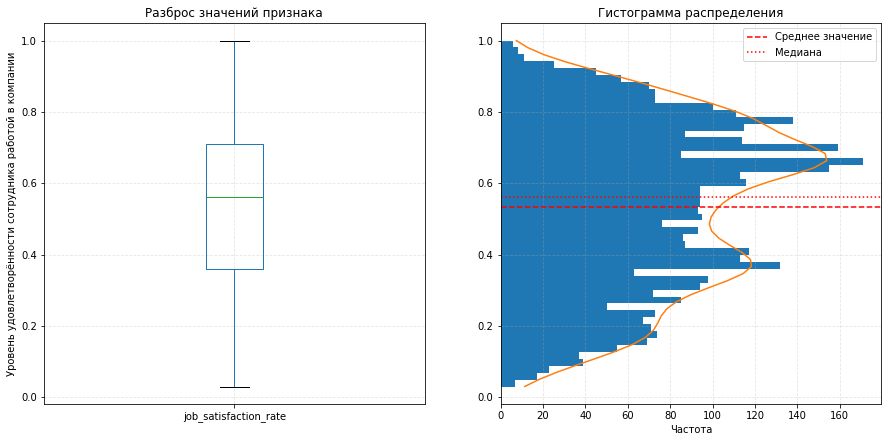

Описательная информация для признака 'job_satisfaction_rate':
Минимальное значение: 0.03 	|	Максимальное значение: 1.0
Среднее значение: 0.53
Медиана: 0.56
Межквартильный размах IQR: 0.35
Границы нормальных значений: от 0.03 до 1.0

Тестовые данные:


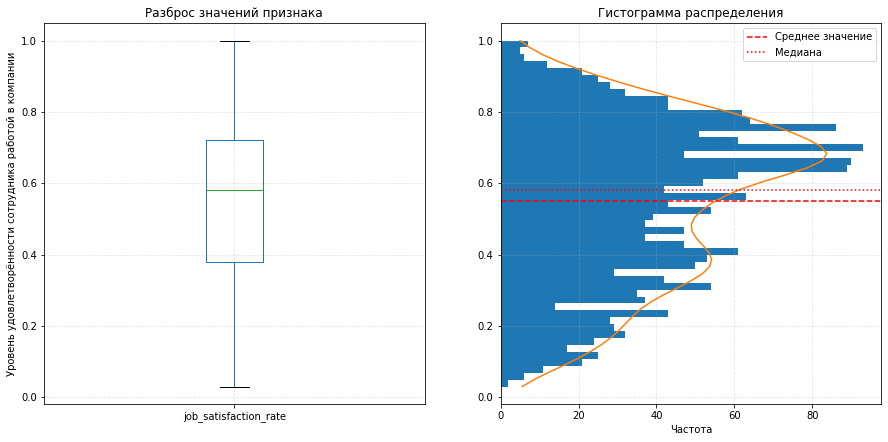

Описательная информация для признака 'job_satisfaction_rate':
Минимальное значение: 0.03 	|	Максимальное значение: 1.0
Среднее значение: 0.55
Медиана: 0.58
Межквартильный размах IQR: 0.34
Границы нормальных значений: от 0.03 до 1.0


In [24]:
print("Обучающие данные:")
stat_num(job_satisfaction_rate_train, 'job_satisfaction_rate')
print("\nТестовые данные:")
stat_num(job_satisfaction_rate_target_test, 'job_satisfaction_rate')

Отобразим график распределения плотности значений, чтобы более подробно изучить распределение:

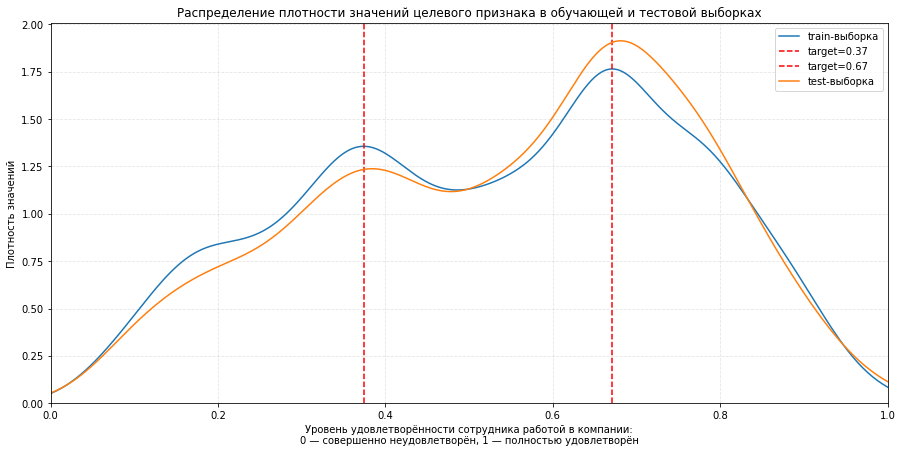

In [25]:
jsr = job_satisfaction_rate_train['job_satisfaction_rate'].plot.kde(label='train-выборка')
x, y = jsr.lines[0]._x, jsr.lines[0]._y
peak_1, peak_2 = find_peak(x,y,(0,0.5),'max')[0], find_peak(x,y,(0.5,1),'max')[0]
plt.axvline(peak_1, color='r', linestyle='dashed', label=f"target={peak_1:.2f}")
plt.axvline(peak_2, color='r', linestyle='dashed', label=f"target={peak_2:.2f}")
job_satisfaction_rate_target_test['job_satisfaction_rate'].plot.kde(label='test-выборка')
plt.xlabel("Уровень удовлетворённости сотрудника работой в компании:\
\n0 — совершенно неудовлетворён, 1 — полностью удовлетворён")
plt.title("Распределение плотности значений целевого признака в обучающей и тестовой выборках")
plt.ylabel("Плотность значений"), plt.xlim(0,1), plt.ylim(bottom=0), plt.legend()
plt.show()

Отобразим распределение целевого признака относительно порога `0.5`:

In [26]:
pd.DataFrame((job_satisfaction_rate_train['job_satisfaction_rate'] >= 0.5).value_counts(normalize=True))

,job_satisfaction_rate
True,0.58
False,0.42


**Вывод**:
* Распределение целевого признака `job_satisfaction_rate` для *обучающих* и *тестовых* данных значительно не отличается.
* В распредлении наблюдается два пика - в районе 0.37 и в районе 0.67. Наличие двух пиков указывает на то, что распределение является бимодальным. Это означает, что в компании существуют две основные группы сотрудников с различным уровнем удовлетворенности. Один пик в районе 0.37 может представлять группу сотрудников, которые скорее "не совсем удовлетворены" своей работой, а другой пик в районе 0.67 - группу, которая в целом довольна своей работой.
* Несмотря на наличие двух пиков, распределение не симметрично по отношению к центру шкалы. 
* На графике плотности значений заметно, что пик плотности количества сотрудников с *положительной* (>0.5) оценкой уровня удовлетворенности работой преобладает над пиком плотности сотрудников с негативной(<0.5).
* Суммарно доля сотрудников имеющих оценку удовлетворенности выше 0.5 и доля сотрудников имеющих оценку ниже поделены в пропорции 58% / 42 %.
* Частоты значений, близким к 0 и 1, очень редки. Это может указывать на то, что в компании нет сотрудников, которые полностью удовлетворены или полностью не удовлетворены работой.
* Аномальных значений не наблюдается.

[Вернуться к оглавлению](#point0)

#### Анализ дискретных числовых и категориальных признаков
##### Признак `dept`
Признак отображает отдел, в котором работает сотрудник.

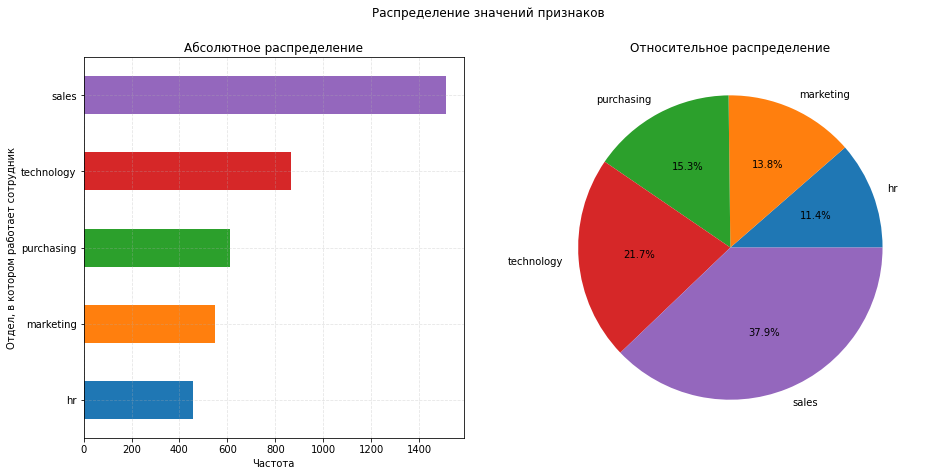

Значения признака 'dept' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 5 ['sales' 'hr' 'technology' 'purchasing' 'marketing']
В том числе:
- sales: 1512 (37.8%)
- hr: 456 (11.4%)
- technology: 866 (21.65%)
- purchasing: 610 (15.25%)
- marketing: 550 (13.75%)


In [27]:
stat_cat(job_satisfaction_rate_train, 'dept')

**Вывод**:
* Категориальный номинальный признак.
* Больше всего сотрудников работает в отделе `sales` (37.9%)
* На втором месте отдел `technology` (21.7%)
* Далее количество сотрудников по отделам purchasing, marketing, hr плавно уменьшается достигая в последнем доли 11.4%.

[Вернуться к оглавлению](#point0)

##### Признак `level`
Признак отображает уровень занимаемой должности.

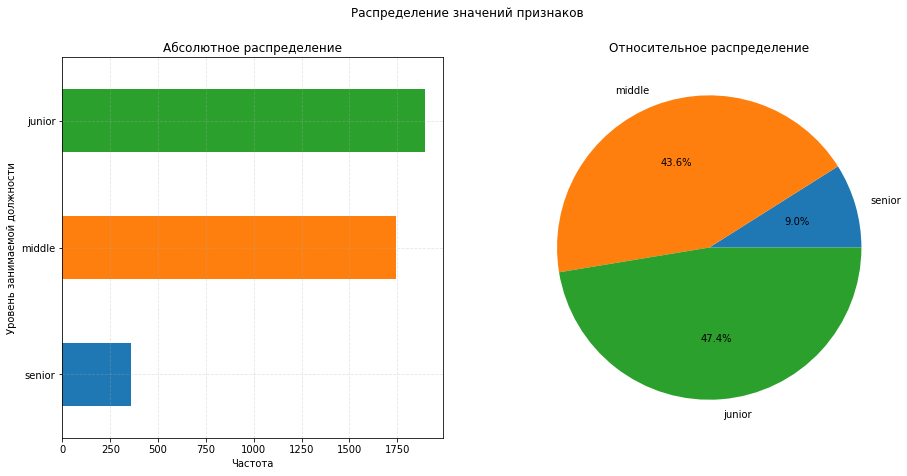

Значения признака 'level' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 3 ['junior' 'middle' 'senior']
В том числе:
- junior: 1894 (47.35%)
- middle: 1744 (43.6%)
- senior: 358 (8.95%)


In [28]:
stat_cat(job_satisfaction_rate_train, 'level')

**Вывод**:
* Категориальный ранговый признак.
* Значения в порядке возрастания уровня занимаемой должности: 'junior' > 'middle' > 'senior'
* В компании примерно равное число сотрудников уровня junior и middle - примерно в районе 45% каждой группы. 
* 9% сотрудники уровня senior

[Вернуться к оглавлению](#point0)

##### Признак `workload`
Признак отображает уровень загруженности сотрудника.

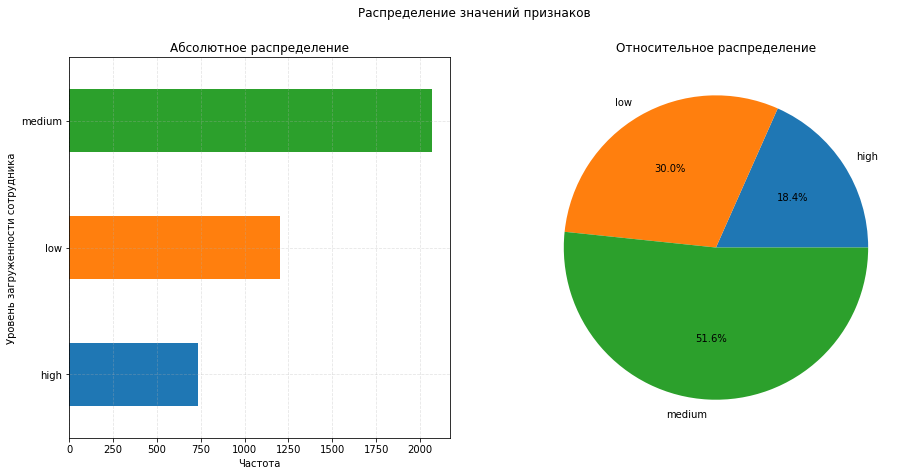

Значения признака 'workload' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 3 ['medium' 'high' 'low']
В том числе:
- medium: 2066 (51.65%)
- high: 734 (18.35%)
- low: 1200 (30.0%)


In [29]:
stat_cat(job_satisfaction_rate_train, 'workload')

**Вывод**:
* Категориальный ранговый признак.
* Значения в порядке возрастания уровня загруженности: 'low' > 'medium' > 'high'
* Примерно половина сотрудников имеет среднюю загруженность.
* Остальная половина - 30 % с низкой загруженностью, и около 20% с высокой.

[Вернуться к оглавлению](#point0)

##### Признак `employment_years`
Признак отображает длительность работы в компании (в годах).

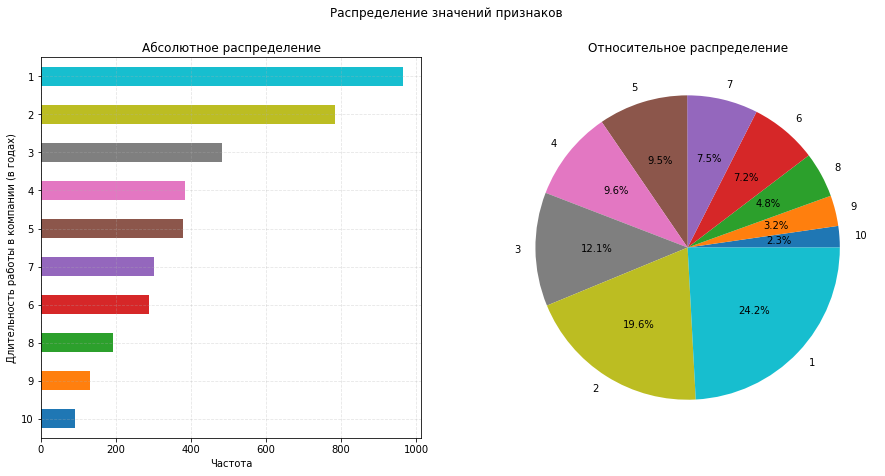

Значения признака 'employment_years' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 10 [ 2  1  4  7  9  6  3 10  8  5]
В том числе:
- 2: 785 (19.62%)
- 1: 966 (24.15%)
- 4: 384 (9.6%)
- 7: 301 (7.53%)
- 9: 130 (3.25%)
- 6: 287 (7.17%)
- 3: 483 (12.07%)
- 10: 91 (2.27%)
- 8: 193 (4.83%)
- 5: 380 (9.5%)


In [30]:
stat_cat(job_satisfaction_rate_train, 'employment_years')

**Вывод**:
* Числовой дискретный признак.
* Больше всего в компании сотрудников, которые работают первый год - 24%
* Далее число сотрудников плавно уменьшается в согласно хронологическому порядку и для сотрудников с десятилетней длительностью достигает всего 2%

[Вернуться к оглавлению](#point0)

##### Признак `last_year_promo`
Признак отображает было ли повышение сотрудника за последний год.

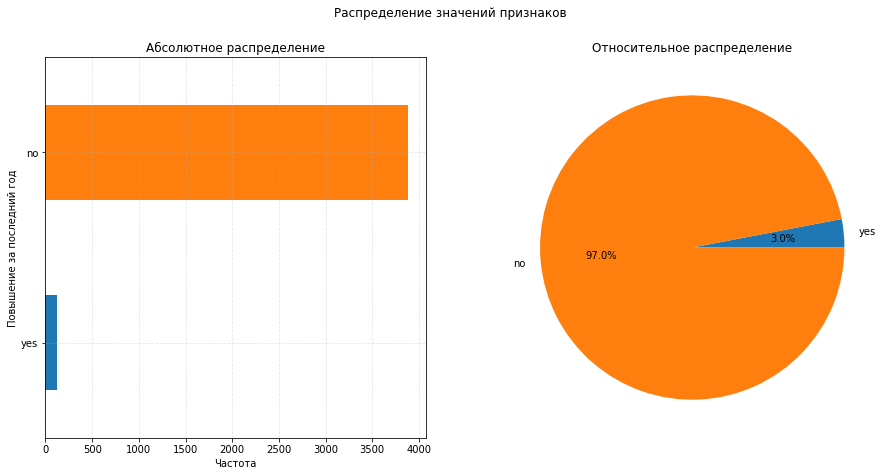

Значения признака 'last_year_promo' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 2 ['no' 'yes']
В том числе:
- no: 3880 (97.0%)
- yes: 120 (3.0%)


In [31]:
stat_cat(job_satisfaction_rate_train, 'last_year_promo')

**Вывод**:
* Категориальный номинальный признак. Бинарный.
* Лишь около 3% сотрудников компании получили повышение за последний год.
* Можно акцентировать на такой маленькой доле таких сотрудников.

[Вернуться к оглавлению](#point0)

##### Признак `last_year_violations`
Признак показывает - нарушал ли сотрудник трудовой договор за последний год.

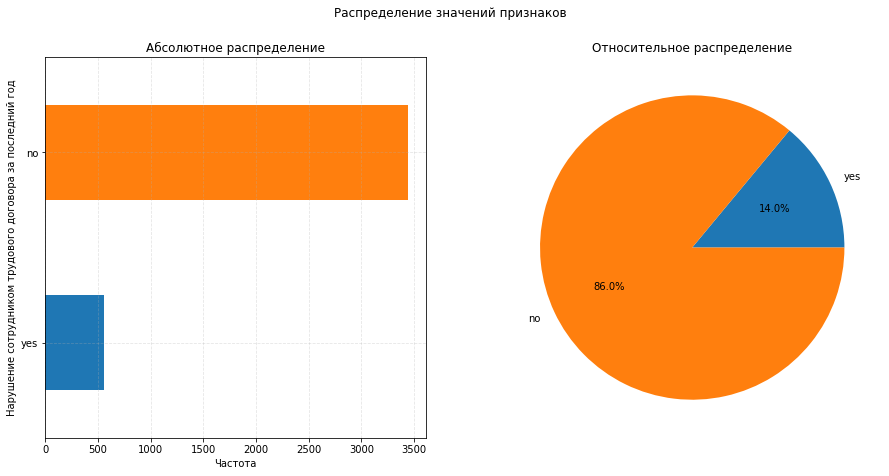

Значения признака 'last_year_violations' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 2 ['no' 'yes']
В том числе:
- no: 3441 (86.03%)
- yes: 559 (13.97%)


In [32]:
stat_cat(job_satisfaction_rate_train, 'last_year_violations')

**Вывод**:
* Категориальный номинальный признак. Бинарный.
* 13% сотрудников нарушили договор за последний год.
* В данном случае можно отметить, что это число не такое уж и маленькое - есть над чем поработать!

[Вернуться к оглавлению](#point0)

##### Признак `supervisor_evaluation`
Признак отображает оценку качества работы сотрудника, которую дал руководитель.

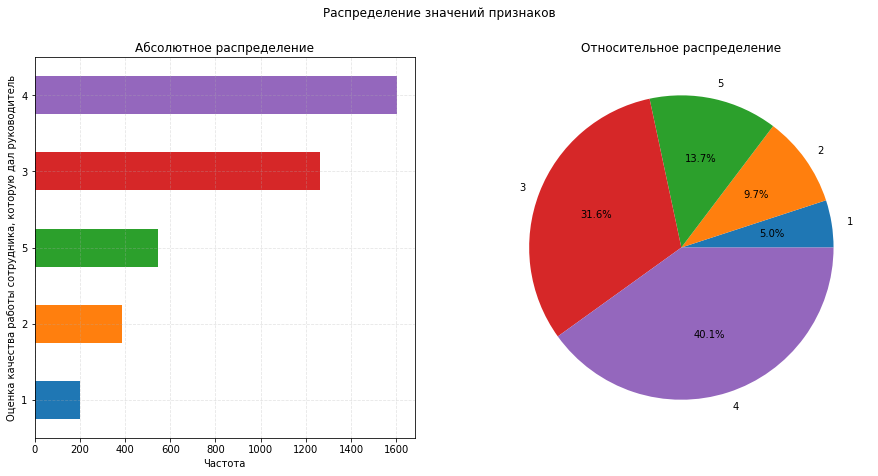

Значения признака 'supervisor_evaluation' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 5 [1 5 2 3 4]
В том числе:
- 1: 201 (5.03%)
- 5: 546 (13.65%)
- 2: 387 (9.68%)
- 3: 1263 (31.57%)
- 4: 1603 (40.08%)


In [33]:
stat_cat(job_satisfaction_rate_train, 'supervisor_evaluation')

**Вывод**:
* Числовой дискретный признак.
* Больше всего сотрудников с оценкой качества 4 (40%) - в целом это хорошо. А самое небольшое число сотрудников имеют низшую оценку 1 (5%).
* Подобная картина невольно задает вопрос о распределении оценок и о возможности улучшения показателей.

[Вернуться к оглавлению](#point0)

### Корреляционный анализ
Отобразим матрицу диаграмм рассеяния для количественных признаков. 

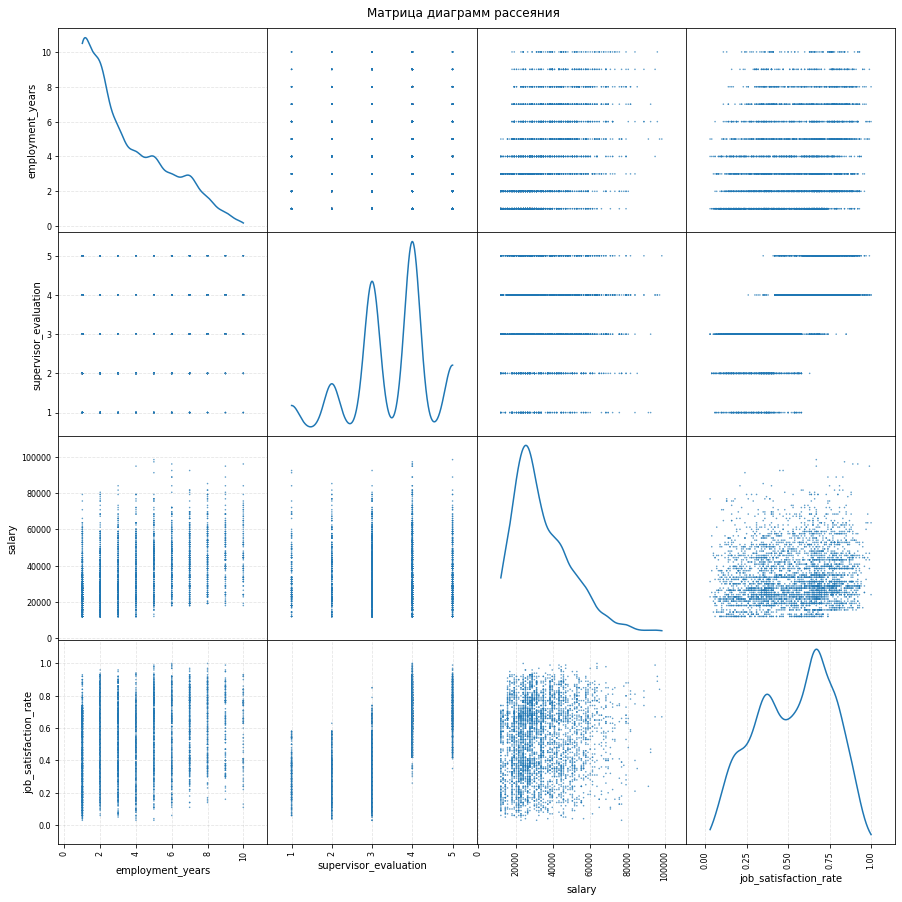

In [34]:
# отрисовка матрицы диаграмм рассеяния, 
pd.plotting.scatter_matrix(job_satisfaction_rate_train, s=10, alpha=0.7, 
                           figsize=(15, 15), diagonal='kde', range_padding=0.3)
plt.suptitle("Матрица диаграмм рассеяния", y=0.9)
plt.show()

Для расчета корреляции признаков будем использовать коэффициент корреляции Фи, $\phi_{k}$, поскольку в таблице наших данных содержатся как количественные, так и категориальные признаки.

Сформируем матрицу корреляции со значениями $\phi_{k}$ для наших данных.

In [35]:
# создаём список с наименованиями непрерывных признаков:
interval_cols = ['salary', 'job_satisfaction_rate']

# формируем матрицу корреляции:
phik_overview_reg = job_satisfaction_rate_train.phik_matrix(interval_cols=interval_cols)
phik_overview_reg

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
dept,1.00,0.00,0.02,0.04,0.00,0.00,0.11,0.28,0.08
level,0.00,1.00,0.42,0.68,0.10,0.00,0.00,0.72,0.08
workload,0.02,0.42,1.00,0.18,0.06,0.00,0.04,0.79,0.06
employment_years,0.04,0.68,0.18,1.00,0.18,0.06,0.00,0.48,0.33
last_year_promo,0.00,0.10,0.06,0.18,1.00,0.00,0.01,0.22,0.19
last_year_violations,0.00,0.00,0.00,0.06,0.00,1.00,0.18,0.01,0.56
supervisor_evaluation,0.11,0.00,0.04,0.00,0.01,0.18,1.00,0.00,0.76
salary,0.28,0.72,0.79,0.48,0.22,0.01,0.00,1.00,0.17
job_satisfaction_rate,0.08,0.08,0.06,0.33,0.19,0.56,0.76,0.17,1.00


Отобразим матрицу корреляции в виде тепловой карты:

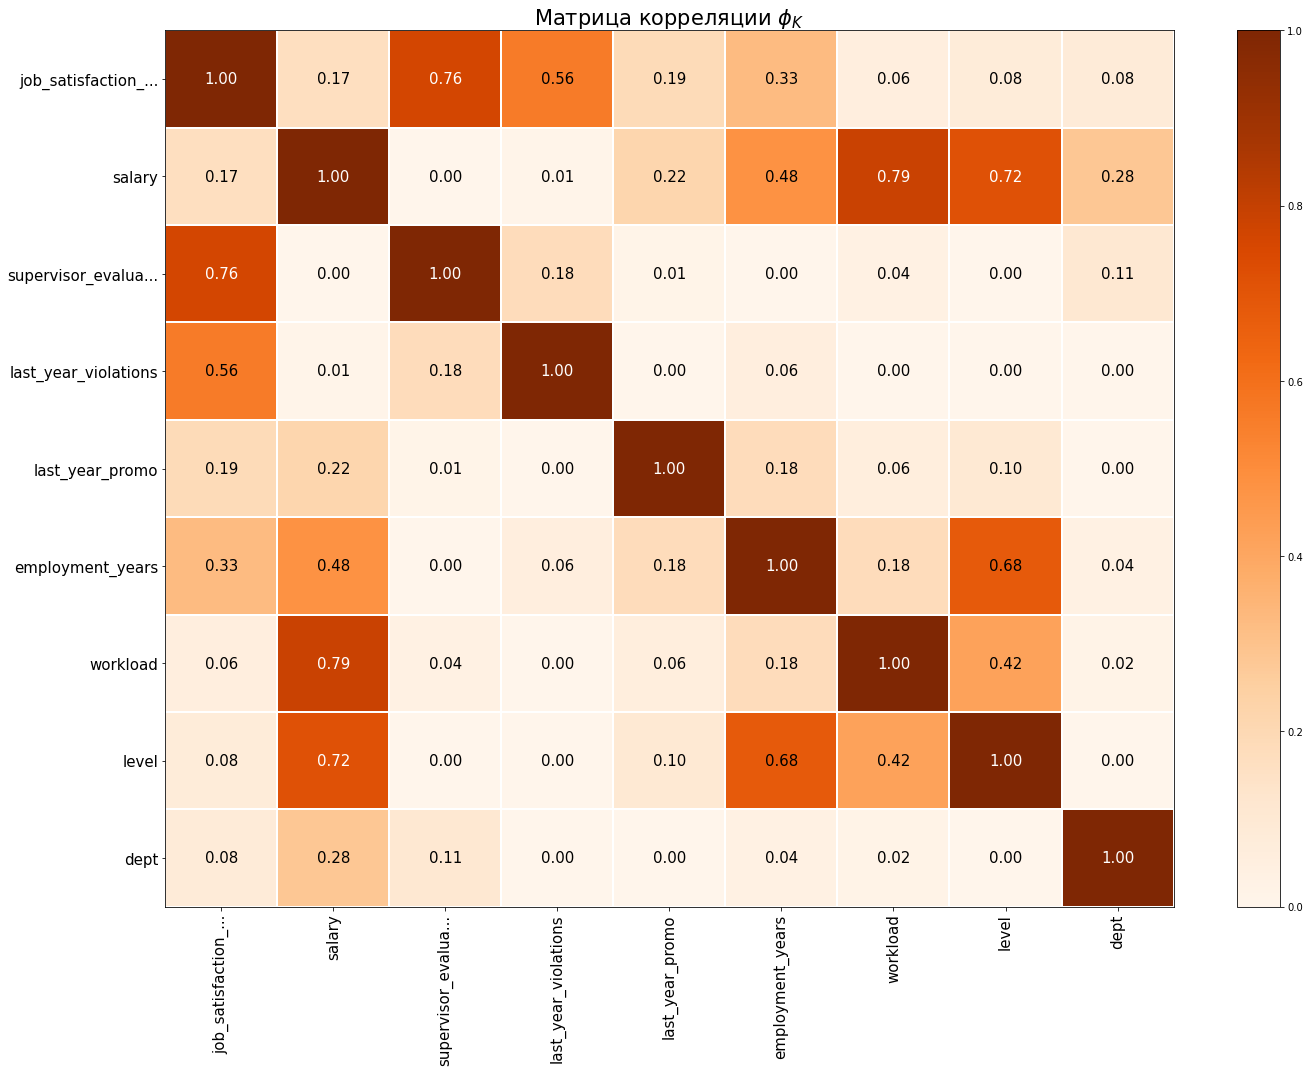

In [36]:
phi_heatmap(phik_overview_reg)

Проверим признаки на наличие мультиколлинеарности.

In [37]:
# список для фиксации количества превышений phi >= 0.9:
phi_list = []

# перебор признаков phik_overview:
for c in phik_overview_reg.columns:
    high_phi_values = len(phik_overview_reg[phik_overview_reg[c] >= 0.9].drop(c))
    
    # добавляем значения: [признак, количество превышений]
    phi_list.append([c, high_phi_values])

# отображаем данные в виде датафрейма:
df_phi = pd.DataFrame(data=phi_list, columns=['Признак', 'Количество превышений'])
display(df_phi)

# выводим итог:
print(f"Всего признаков с мультиколлинеарностью: {df_phi[df_phi['Количество превышений'] > 0].shape[0]}")

,Признак,Количество превышений
0,dept,0
1,level,0
2,workload,0
3,employment_years,0
4,last_year_promo,0
5,last_year_violations,0
6,supervisor_evaluation,0
7,salary,0
8,job_satisfaction_rate,0


Всего признаков с мультиколлинеарностью: 0


А также проверим какие признаки показывают очень слабую корреляцию с целевым признаком ($\phi_k < 0.1$):

In [38]:
low_phi = phik_overview_reg[phik_overview_reg['job_satisfaction_rate'] < 0.1]
display(pd.DataFrame(low_phi['job_satisfaction_rate']))
print(f'Всего признаков с низкой корреляцией с целевым признаком - {low_phi.shape[0]}:')
print(low_phi.index.to_list())

,job_satisfaction_rate
dept,0.08
level,0.08
workload,0.06


Всего признаков с низкой корреляцией с целевым признаком - 3:
['dept', 'level', 'workload']


**Вывод**: 
* В имеющемся наборе данных отсутствуют признаки с мультиколлинеарностью ($\phi_k \geq 0.9$)
* В имеющемся наборе данных явно не наблюдается утечка данных, хотя необходимо зафиксировать высокую корреляцию между целевым признаком `job_satisfaction_rate` и обучающим признаком `supervisor_evaluation` — $\phi_k = 0.76$
* Признаки `dept`, `level`, `workload` показывают низкую степень корреляции с целевым признаком.

[Вернуться к оглавлению](#point0)

### Подготовка данных
Для решения задачи регрессии имеем следующий набор данных:

**Целевой признак**:
* `job_satisfaction_rate` - уровень удовлетворённости сотрудника работой в компании. Непрерывный числовой признак. Значения распределяются от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.

**Числовые непрерывные признаки**:
* `salary` - ежемесячная зарплата сотрудника

**Числовые дискретные признаки**:
* `employment_years` - длительность работы в компании (в годах).
* `supervisor_evaluation` - оценка качества работы сотрудника, которую дал руководитель.

**Категориальные бинарные признаки**:
* `last_year_promo` - показывает, было ли повышение за последний год.
* `last_year_violations` - показывает, нарушал ли сотрудник трудовой договор за последний год.

**Категориальные номинальные признаки**:
* `dept` -  отдел, в котором работает сотрудник.

**Категориальные ранговые признаки**:
* `level` - уровень занимаемой должности.
* `workload` - уровень загруженности сотрудника.

Отобразим описательную информацию для числовых признаков:

In [39]:
job_satisfaction_rate_train[['salary', 'employment_years', 'supervisor_evaluation']].describe()

,salary,employment_years,supervisor_evaluation
count,4000.00,4000.00,4000.00
mean,33926.70,3.72,3.48
std,14900.70,2.54,1.01
min,12000.00,1.00,1.00
25%,22800.00,2.00,3.00
50%,30000.00,3.00,4.00
75%,43200.00,6.00,4.00
max,98400.00,10.00,5.00


* Числовые признаки (`salary`, `employment_years`, `supervisor_evaluation`) имеют разный масштаб значений, следовательно, при обучении модели необходимо применить **масштабирование**.
* Категориальный номинальный признак (`dept`), а также категориальные бинарные признаки (`last_year_promo`, `last_year_violations`) необходимо закодировать при помощи **OneHotEncoder**.
* Категориальные ранговые признаки (`level`, `workload`) необходимо закодировать при помощи **OrdinalEncoder**.

Поскольку в нашем случае для **тестовой выборки** <ins>обучающие</ins> и <ins>целевой</ins> признак берутся из разных датафреймов, перед тем как формировать переменные с признаками, необходимо убедиться в идентичности их структуры. Ранее, в пункте [1.2.4.2  Обработка явных дубликатов](#Обработка-явных-дубликатов) мы выяснили, что набор значений `id` идентичен. Остается проверить - совпадает ли порядок `id`.

Отобразим порядок индексов для обучающих и целевого признака test-выборки:

In [40]:
pd.DataFrame({'features':features_test.index,'target':job_satisfaction_rate_target_test.index}).head()

,features,target
0,485046,130604
1,686555,825977
2,467458,418490
3,418655,555320
4,789145,826430


Как видно, даже в первых пяти записях порядок индексов отличается.

Поэтому при формировании переменных для тестовых выборок нужно дополнительно применить сортировку по `id`.

Сформируем переменные содержащие значения обучающих и целевого признаков для train и test выборок:

In [41]:
# формирование переменных обучающих признаков:
X_train = job_satisfaction_rate_train.drop('job_satisfaction_rate', axis=1)
X_test  = features_test.sort_index()

# формирование переменных целевого признаков:
y_train = job_satisfaction_rate_train['job_satisfaction_rate']
y_test  = job_satisfaction_rate_target_test.sort_index()['job_satisfaction_rate']

Сформируем списки, где обозначены типы кодирования и масштабирования признаков.

In [42]:
# числовые признаки для масштбирования:
num_columns = X_train.select_dtypes(exclude='object').columns.to_list() 

# признаки OneHotEncoder-кодирования:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']  

# признаки OrdinalEncoder-кодирования:
ord_columns = ['level', 'workload']  

Обозначим пайплайн **OneHotEncoder**-кодирования:
* Инструмент **SimpleImputer**. Один из категориальных признаков **OneHotEncoder**-кодирования (`dept`) содержит пропуски. Пропуски также могут возникнуть при кодировании неизвестных категорий. Обработать их поможет инструмент **SimpleImputer**, который заменит недостающие значения `missing_values=np.nan` на моду `strategy='most_frequent'`
* Кодировщик **OneHotEncoder** применяется со следующими параметрами:
  * `drop='first'` - обработка дамми-ловушек - каждый первый столбец при кодировании качественного признака будет удалён
  * `handle_unknown='ignore'` - игнорируем неизвестные категории
  * `sparse_output=False` - устанавливает формат данных, в котором кодировщик вернёт результаты. Значение `False` позволит изучать результаты кодирования визуально в ходе исследования

In [43]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)) 
    ]
    )

Обозначим пайплайн **OrdinalEncoder**-кодирования:
* `simpleImputer_before_ord` - заполнение пропусков самым часто встречающимся значением с помощью **SimpleImputer** перед кодированием.
* `ord` - проведение Ordinal-кодирования с помощью **OrdinalEncoder**:
  *  кодировщику передается список с *упорядоченными* значениями категорий:
  
Признак|Категории
-|-
level|['junior', 'middle', 'senior']
workload|['low', 'medium', 'high']

  * `handle_unknown='use_encoded_value'`, `unknown_value=np.nan` - неизвестным категория присвоится значение `NaN` 
* `simpleImputer_after_ord` - заполнение пропусков, которые появляются после Ordinal-кодирования.

In [44]:
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['junior', 'middle', 'senior'],
                    ['low', 'medium', 'high']
                ],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

Создаём общий пайплайн для подготовки данных:

In [45]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough'
)

**Вывод**:
* Обозначили пайплайн подготовки данных.
* Числовые признаки имеют разный масштаб данных, поэтому при обучении модели требуется применить масштабирование.
* Категориальный номинальный признак (`dept`), а также категориальные бинарные признаки (`last_year_promo`, `last_year_violations`) закодированы при помощи **OneHotEncoder**.
* Категориальные ранговые признаки (`level`, `workload`) закодированы при помощи **OrdinalEncoder**.
* Заполнение пропусков категориальных данных осуществляется с помощью **SimpleImputer**.

[Вернуться к оглавлению](#point0)

### Обучение моделей
#### Создание пайплайна

Создаём итоговый пайплайн: подготовка данных и модель. В качестве модели по умолчанию - DecisionTreeRegressor:

In [46]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

Создаем сетку, содержающую набор моделей и их гиперпараметров. 

Исследуются модели:

Название модели|Гиперпараметры
-|:-
DecisionTreeRegressor|max_depth: [2,5,13],<br>max_features: [2,5,12]
LinearRegression|fit_intercept: [True, False]
SVR|C: [1, 5],<br>gamma: ['scale', 'auto']

Ко всем моделям применяются методы масштабирования числовых признаков **StandardScaler** и **MinMaxScaler**.

<div style="border:solid orange 2px; padding: 20px">
<font color='red'>*</font> <i>Примечание</i>: значения гиперпаметров получены путем перебора значений для каждой модели и выбора из всех значений некой комбинации обеспечивающей высокое значение метрики. Для финальной сетки оставил небольшое число вариаций с целью сократить время на обучения модели.

In [47]:
param_grid = [
    # словарь для модели DecisionTreeRegressor
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': [2,5,13],
        'models__max_features': [2,5,12],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    # словарь для модели LinearRegression
    {
        'models': [LinearRegression()],
        'models__fit_intercept': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVR
    {
        'models': [SVR(kernel='rbf')], 
        'models__C': [1, 5],
        'models__gamma': ['scale', 'auto'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
}
]

Выбор лучшей модели производится с помощью метрики — $SMAPE$ (*англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»*). 

Метрика $SMAPE$ вычисляется так:
<p><center>$SMAPE = \frac{100}{n}\displaystyle\sum_{i=1}^{n}\frac{|y_i-\hat{y}_i|}{(|y_i|+|\hat{y}_i|)/2},$</center></p>
где:

* $y_i$ — фактическое значение целевого признака для объекта с порядковым номером $i$ в выборке;
* $\hat{y}_i$ — предсказанное значение целевого признака для объекта с порядковым номером $i$ в выборке;
* $n$ — количество объектов в выборке;
* $\sum_{i=1}^{n}$ — сумма значений, полученная в результате операций, которые следуют за этим знаком, для всех объектов с порядковым номером от $i$ до $n$ в выборке.

Зададим функцию для расчета метрики $SMAPE$:

In [48]:
def smape(y_true, y_pred):
    """
    Расчет метрики SMAPE
    """
    return np.mean((np.abs(y_true - y_pred)) / ((np.abs(y_true) + np.abs(y_pred)) / 2)) * 100

Определим алгоритм оценки качества модели: 
* в качестве метрики использем $SMAPE$, 
* в качестве критерия поиска - **поиск наименьшего значения** (опция `greater_is_better=False`)

In [49]:
smape_scorer = make_scorer(smape, greater_is_better=False)

Создаем пайплайн с приминением автоматизированного поиска гиперпараметров **GridSearchCV** со следующими параметрами:
* Установка модели пайплайна по умолчанию `pipe_final`.
* Применение заданной сетки гиперпараметров моделей `param_grid`.
* `cv=5` - применяется кросс-валидация из 5 блоков
* `scoring=smape_scorer` - в качестве метрики качества моделей используется SMAPE. 
* `n_jobs=-1` - количество вычислительных мощностей (чтобы считалось быстрее, указывают `-1`)

In [50]:
grid_search_reg = GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring=smape_scorer,
    n_jobs=-1
)

[Вернуться к оглавлению](#point0)

#### Поиск лучшей модели
Запускаем пайплайн на тренировочных данных:

In [51]:
grid_search_reg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(...
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [LinearRegression()],
                          'models__fit_intercept': [True, False],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [SVR()], 'models__C': [1, 5],
                          'models__gamma': ['scale', 'auto'],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring=make_scorer(smape, greater_is_better=False))

Отобразим параметры лучшей модели и полученную метрику на кросс-валидации:

In [52]:
print('Лучшая модель и её параметры:\n', grid_search_reg.best_estimator_)
print('Метрика лучшей модели на кросс-валидации:', -grid_search_reg.best_score_)

Лучшая модель и её параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                             

Отобразим 10 лучших результатов среди исследуемых моделей:

In [53]:
result_reg = pd.DataFrame(grid_search_reg.cv_results_).sort_values('rank_test_score')[
        ['rank_test_score', 'param_models', 'mean_test_score','mean_fit_time','params']
]
result_reg['mean_test_score'] = -result_reg['mean_test_score']
result_reg['param_models'] = result_reg['param_models'].astype('str').str.replace('\(.*','', regex=True)
result_reg.head(10).style.format({'mean_test_score': '{:.4f}'})

,rank_test_score,param_models,mean_test_score,mean_fit_time,params
39,1,SVR,14.6856,0.268318,"{'models': SVR(), 'models__C': 5, 'models__gamma': 'scale', 'preprocessor__num': StandardScaler()}"
33,2,SVR,14.7232,0.195247,"{'models': SVR(), 'models__C': 1, 'models__gamma': 'scale', 'preprocessor__num': StandardScaler()}"
42,3,SVR,14.9956,0.297738,"{'models': SVR(), 'models__C': 5, 'models__gamma': 'auto', 'preprocessor__num': StandardScaler()}"
25,4,DecisionTreeRegressor,15.0126,0.024324,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'models__max_features': 12, 'preprocessor__num': MinMaxScaler()}"
24,5,DecisionTreeRegressor,15.0304,0.024739,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'models__max_features': 12, 'preprocessor__num': StandardScaler()}"
26,6,DecisionTreeRegressor,15.0449,0.022449,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'models__max_features': 12, 'preprocessor__num': 'passthrough'}"
23,7,DecisionTreeRegressor,15.8464,0.020808,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'models__max_features': 5, 'preprocessor__num': 'passthrough'}"
21,8,DecisionTreeRegressor,15.8839,0.022949,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'models__max_features': 5, 'preprocessor__num': StandardScaler()}"
22,9,DecisionTreeRegressor,15.8849,0.022277,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'models__max_features': 5, 'preprocessor__num': MinMaxScaler()}"
36,10,SVR,16.1658,0.186138,"{'models': SVR(), 'models__C': 1, 'models__gamma': 'auto', 'preprocessor__num': StandardScaler()}"


Также отобразим таблицу с лучшими результатами исследуемых моделей:

In [54]:
best_scores_reg = (result_reg.loc[result_reg.groupby('param_models')['mean_test_score'].idxmin()]
               .sort_values(by='rank_test_score'))
best_scores_reg.style.format({'mean_test_score': '{:.4f}'})

,rank_test_score,param_models,mean_test_score,mean_fit_time,params
39,1,SVR,14.6856,0.268318,"{'models': SVR(), 'models__C': 5, 'models__gamma': 'scale', 'preprocessor__num': StandardScaler()}"
25,4,DecisionTreeRegressor,15.0126,0.024324,"{'models': DecisionTreeRegressor(random_state=42), 'models__max_depth': 13, 'models__max_features': 12, 'preprocessor__num': MinMaxScaler()}"
32,35,LinearRegression,24.5621,0.043796,"{'models': LinearRegression(), 'models__fit_intercept': False, 'preprocessor__num': 'passthrough'}"


Графически отобразим значения метрик, а также среднего времени обучения моделей:

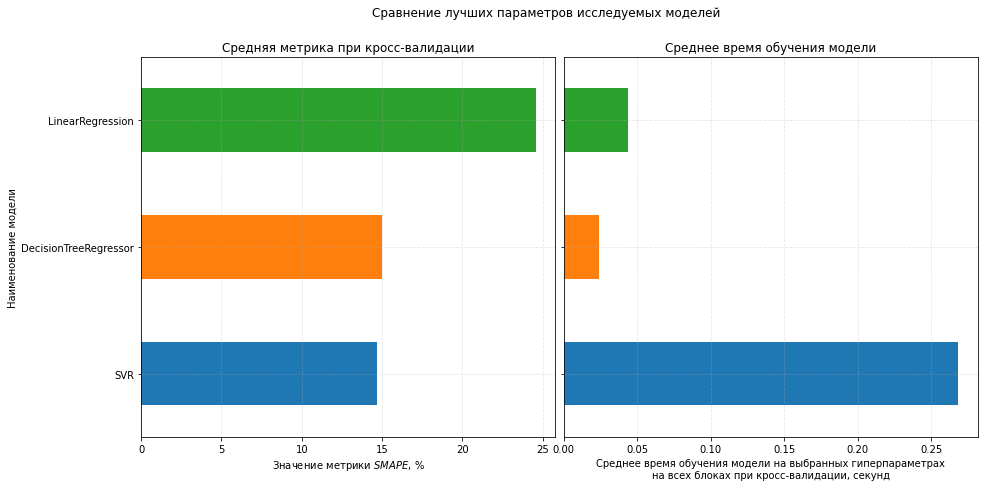

Метрика лучшей модели SVR (14.69) на 2.23% лучше метрики модели DecisionTreeRegressor (15.01)
Среднее время на обучение модели SVR (0.268) в 11 раз больше модели DecisionTreeRegressor (0.024)


In [55]:
models_compare(best_scores_reg, 'reg')

[Вернуться к оглавлению](#point0)

#### Оценка качества модели на тестовых данных
Рассчитаем метрику лучшей модели на тренировочных данных:

In [56]:
y_test_pred = grid_search_reg.predict(X_test)
smape_test = smape(y_test_pred, y_test)
print(f'Метрика SMAPE на тестовой выборке: {smape_test}')

Метрика SMAPE на тестовой выборке: 13.515614070574342


[Вернуться к оглавлению](#point0)

#### Проверка модели на адекватность

Чтобы оценить адекватность модели в задачах регрессии, нужно сравнить её со случайной. Например рассчитать метрику качества для случая, когда целевой признак заполнен одним и тем же значением. Если метрика качества лучшей модели больше, чем у "случайной", значит модель прошла проверку на адекватность.

Для данной цели я использую модель **DummyRegressor** из библиотеки `sklearn`. Данная модель формирует предсказания на простом принципе - заполняя значения какой-либо постоянной величиной - по умолчанию подставляя среднее значение (`mean`).

In [57]:
# инициализация модели:
dummy_model = DummyRegressor()

# обучение модели на train-выборке:
dummy_model.fit(X_train, y_train)

# формирование предсказаний на основе признаков test-выборки:
dummy_predictions_test = dummy_model.predict(X_test)

# расчет метрики:
smape_dummy = smape(y_test, dummy_predictions_test)

# оценка результата:
if smape_test < smape_dummy:
    print("✅ Модель прошла проверку на адекватность:",
          f"метрика модели '{grid_search_reg.best_estimator_.steps[-1][1].__class__.__name__}' ({smape_test:.2f})",
          f"лучше, чем у случайной ({smape_dummy:.2f})")
else:
    print("Модель нуждается в доработке: метрика качества низкая 👎")

✅ Модель прошла проверку на адекватность: метрика модели 'SVR' (13.52) лучше, чем у случайной (38.22)


[Вернуться к оглавлению](#point0)

#### Задача регрессии: выводы

* Для решения задачи регрессии предсказания целевого "уровень удовлетворённости сотрудника работой в компании" произведен поиск лучшей модели МО.
* Поиск модели осуществлялся с помощью пайплайна - инструмента, который позволяет автоматизировать действия по подготовке данных, обучению моделей и оценке их качества.
* Перебор значений осуществлялся с помощью **GridSearchCV** - автоматизированного инструмента поиска гиперпараметров.
* Для решения задачи обучались следующие модели регрессии:
  * **DecisionTreeRegressor**
  * **LinearRegression**
  * **SVR**
* В процессе обучения моделей применялась кросс-валидация из 5 блоков.
* Метрика оценки качества моделей - SMAPE.
* Лучший результат на обучающих данных показала модель **SVR**(`kernel='rbf'`, `C=5`, `gamma='scale'`). 
* Метрика SMAPE лучшей модели на тренировочной выборке: 13.52, что соответсвует критерию успеха  ($SMAPE ≤ 15$)
* Модель прошла проверку на адекватность.
* В десятку моделей с лучшим результатом попали SVC, DecisionTreeRegressor показав хорошие значения метрики, которые близки друг к другу. Модели LinearRegression не удалось достичь аналогичных результатов.
* Успех нелинейных моделей можно объяснить характером данных - признаки как правило не имеют линейную корреляцию с целевым признаком.
* Можно также отметить результаты производительности процесса обучения моделей:
  * Метрика лучшей модели SVR всего на 2.23% лучше метрики модели DecisionTreeRegressor.
  * При этом, среднее время на обучение модели SVR в 9 раз больше модели DecisionTreeRegressor
  * Для цели оптимизации времени обучения, не меняя набор моделей,  можно пожертвовать небольшой разницей в метрике модели, чтобы получить значимый выигрыш по производительности.

[Вернуться к оглавлению](#point0)

## Задача классификации: предсказание увольнения сотрудника из компании
### Загрузка и изучение данных
#### Загрузка данных
Для решения второй задачи предоставлены следующие данные:
* `train_quit.csv` - обучающие и целевой признаки тренировочной выборки.
* `test_features.csv` - обучающие признаки тестовой выборки.
* `test_target_quit.csv` - целевой признак тестовой выборки.

Причем, в качестве обучающих признаков тестовой выборки используется тот же датасет, что и для первой задачи, поэтому его повторно загружать не будем.

Загрузим данные для задачи классификации:

In [58]:
quit_train       = pd.read_csv('/datasets/train_quit.csv')
target_quit_test = pd.read_csv('/datasets/test_target_quit.csv')

[Вернуться к оглавлению](#point0)

#### Изучение данных
Для удобства и наглядности информации зададим имеющимся датасетам свойства с именами:

In [59]:
quit_train.dsc       = 'quit_train'
target_quit_test.dsc = 'target_quit_test'

Выведем общую информацию об имеющихся датасетах:

In [60]:
for d in [quit_train, features_test, target_quit_test]:
    dataset_info(d)
    print('\n' + '- '*50 + '\n')

len_train, len_test = quit_train.shape[0], features_test.shape[0]
print("Выборки поделены в пропорциях:",'\33[43m' + f"[train: {100*len_train / (len_train+len_test):.2f}%]" + end + ',',
      '\33[45m' + f"[test: {100*len_test / (len_train+len_test):.2f}%]")

• Первые 10 строк датасета: [quit_train]


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no
5,699916,sales,junior,low,1,no,yes,3,18000,yes
6,417070,technology,middle,medium,8,no,no,2,44400,no
7,165489,sales,middle,low,4,no,no,5,19200,no
8,996399,marketing,middle,low,7,no,no,4,25200,no
9,613206,technology,middle,medium,2,no,no,3,45600,yes


• Основная информация о датасете: [quit_train]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

• Первые 10 строк датасета: [features_test]


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800
686555,hr,junior,medium,1,no,no,4,30000
467458,sales,middle,low,5,no,no,4,19200
418655,sales,middle,low,6,no,no,4,19200
789145,hr,middle,medium,5,no,no,5,40800
429973,purchasing,middle,medium,6,no,no,3,42000
850699,technology,junior,medium,3,no,no,3,26400
500791,sales,middle,high,9,no,no,4,49200
767867,marketing,middle,high,3,no,yes,4,62400


• Основная информация о датасете: [features_test]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 485046 to 771859
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dept                   1997 non-null   object
 1   level                  1999 non-null   object
 2   workload               1999 non-null   object
 3   employment_years       2000 non-null   int64 
 4   last_year_promo        2000 non-null   object
 5   last_year_violations   2000 non-null   object
 6   supervisor_evaluation  2000 non-null   int64 
 7   salary                 2000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 140.6+ KB

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

• Первые 10 строк датасета: [target_quit_test]


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
5,223063,no
6,810370,no
7,998900,no
8,578329,no
9,648850,no


• Основная информация о датасете: [target_quit_test]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

Выборки поделены в пропорциях: [train: 66.67%], [test: 33.33%]


Насколько видно, данные предоставленные для первой и второй задачи имеют схожую структуру.

Отобразим различия *набора признаков* для обучающих данных предоставленных для первой и второй задачи:

In [61]:
set(job_satisfaction_rate_train.columns) ^ set(quit_train.columns)

{'id', 'job_satisfaction_rate', 'quit'}

Набор признаков идентичен, за исключением разных целевых признаков - `job_satisfaction_rate`, `quit`, а также признака `id`, который для данных первой задачи был переведен в индекс.

Также проверим, для двух наборов данных - при одинаковом списке обучающих признаков - уникальны ли сами данные. Об этом можно судить, проверив список уникальных `id`, метод `isdisjoint` проверяет, что у множеств нет общих элементов:

In [62]:
set(job_satisfaction_rate_train.index).isdisjoint(set(quit_train['id']))

True

**Выводы**:
* Для решения второй задачи предоставлены датасеты: `train_quit.csv`, `test_features.csv`, `test_target_quit.csv`. 
* Обучающие данные второй задачи по структуре похожи на обучающие данные из первой задачи - отличие только в целевых признаках.
* Стоит отметить, что набор `id` в обучающих данных для первой и второй задач - разный.
* Датасет `quit_train`:
  * Состоит из 10 столбцов и 4000 строк.
  * Наименования столбцов соответствуют описанию.
  * Не содержит пропусков.
* Датасет `features_test` (из первой задачи):
  * Состоит из 8 столбцов (признак `id` переведен в индексы) и 2000 строк.
  * Наименования столбцов соответствуют описанию.
  * Содержит пропуски среди обучающих признаков.
* Датасет `target_quit_test`:
  * Состоит из 2 столбцов и 2000 строк.
  * Наименования столбцов соответствуют описанию.
  * Не содержит пропусков.
* Выборки поделены в пропорциях: <span style="border-width:2px; border-style:solid; border-color:#ddb62b; padding: 3px;">66.67% {обучающая}</span> + <span style="border-width:2px; border-style:solid; border-color:#d160c4; padding: 3px;">33.33% {тестовая}</span>
* Имеющиеся данные соответствуют описанию и структуре, заявленным заказчиком.
* Значения ячеек выглядят реалистично.
* Значения ячеек выглядят уникально.
* Заголовки столбцов датасетов выглядят соответствующими стандарту оформления данных.

[Вернуться к оглавлению](#point0)

### Предобработка данных
#### Переименование столбцов
Отобразим заголовки столбцов для наших данных:

In [63]:
print("Заголовки датасета:")
for d in [quit_train, features_test, target_quit_test]:
    print('• '+ bold + d.dsc + end, d.columns.to_list())
    print()

Заголовки датасета:
• quit_train ['id', 'dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'salary', 'quit']

• features_test ['dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation', 'salary']

• target_quit_test ['id', 'quit']



Заголовки датафреймов выглядят соответствующими стандарту. 

Используя вспомогательную функцию, можно убедиться, что в заголовках отсутствуют нежелательные символы:

In [64]:
for df in [quit_train, features_test, target_quit_test]:
    print(bold + df.dsc + end + ':', is_that_snake(df.columns))

quit_train: ✅ Проблем не обнаружено
features_test: ✅ Проблем не обнаружено
target_quit_test: ✅ Проблем не обнаружено


**Вывод**: убедились, что заголовки датасетов соответствуют стандарту оформления данных.

[Вернуться к оглавлению](#point0)

#### Обработка пропусков
На этапе первичного ознакомления с данными в пропуски были замечены только в датасете `features_test`, который подготовлен в рамках первой задачи.

Проверим еще раз:

In [65]:
for d in [quit_train, features_test, target_quit_test]:
    print(f'- Количество пропусков в датасете {d.dsc}: {d.isna().sum().sum()}')    

- Количество пропусков в датасете quit_train: 0
- Количество пропусков в датасете features_test: 5
- Количество пропусков в датасете target_quit_test: 0


In [66]:
features_test[features_test.isna().any(axis=1)].style.highlight_null()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
id,,,,,,,,
590867,marketing,junior,nan,4,no,no,4,28800
609865,nan,junior,medium,1,no,no,1,20400
471990,sales,nan,low,1,no,no,3,12000
832342,nan,junior,medium,1,no,no,4,28800
822186,nan,middle,medium,3,no,no,4,38400


**Выводы**:
* Датасет `features_test` содержит 5 пропусков в категориальных признаках среди признаков `dept`, `level`, `workload`.
* Заполнение пропусков будет осуществлено в пайплане на этапе подготовки данных.

#### Изменение типов данных
Для имеющихся датасетов отобразим 1 произвольную строку с данными, а также строку с указанием типов данных:

In [67]:
for d in [quit_train, features_test, target_quit_test]:
    display(pd.concat([d.sample(), 
    pd.DataFrame(d.dtypes, columns=['dtypes']).transpose()]).style.set_caption(f"Датасет '{d.dsc}':"))

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
1089,683360,purchasing,junior,medium,2,no,no,5,22800,no
dtypes,int64,object,object,object,int64,object,object,int64,int64,object


,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
965134,hr,senior,medium,7,yes,yes,3,52800
dtypes,object,object,object,int64,object,object,int64,int64


,id,quit
929,337260,yes
dtypes,int64,object


**Вывод**: типы данных признаков не требуют изменений.

[Вернуться к оглавлению](#point0)

#### Обработка дубликатов
##### Обработка неявных дубликатов
Перед тем как искать полные дубликаты, проверим насколько уникальны значения в строковых признаках. 

Отобразим уникальные значения таких признаков:

In [68]:
for d in [quit_train, features_test, target_quit_test]:
    print(bold + d.dsc + end + ':')
    for c in d.columns:
        if d[c].dtype == 'object':
            print(f'- {c}: {list(d[c].unique())}')
    print()

quit_train:
- dept: ['sales', 'purchasing', 'marketing', 'technology', 'hr']
- level: ['middle', 'junior', 'sinior']
- workload: ['high', 'medium', 'low']
- last_year_promo: ['no', 'yes']
- last_year_violations: ['no', 'yes']
- quit: ['no', 'yes']

features_test:
- dept: ['marketing', 'hr', 'sales', 'purchasing', 'technology', nan]
- level: ['junior', 'middle', 'senior', nan]
- workload: ['medium', 'low', 'high', nan]
- last_year_promo: ['no', 'yes']
- last_year_violations: ['no', 'yes']

target_quit_test:
- quit: ['yes', 'no']



Значения выглядят уникальными.

Как и в первой задаче произведем замену значения признака `level`: `sinior` --> `senior`

In [69]:
quit_train['level'] = quit_train['level'].replace('sinior', 'senior')

**Выводы**:
* Значения признаков датасетов `quit_train` и `target_quit_test` не имеют неявных дубликтов.
* Для признака `level` произведена замена значения: `sinior` --> `senior`

[Вернуться к оглавлению](#point0)

##### Обработка явных дубликатов
Теперь проверим, есть ли явные дубликаты в датасетах `quit_train` и `target_quit_test` (`features_test` уже проверен в рамках первой задачи):

In [70]:
print('Количество дублирующихся строк:')
for df in [quit_train, target_quit_test]:
    print(f'- {df.dsc}: {df.duplicated().sum()}')

Количество дублирующихся строк:
- quit_train: 0
- target_quit_test: 0


Полные дубликаты строк отсутствуют.

Убедимся, что в имеющихся датасетах отсутствуют дубликаты в `id`:

In [71]:
quit_train.duplicated(subset=['id']).sum(), target_quit_test.duplicated(subset=['id']).sum()

(0, 0)

Поскольку в рассматриваемых данных все значения `id` уникальны - установим их в качестве индексов:

In [72]:
quit_train.set_index('id', inplace=True)
target_quit_test.set_index('id', inplace=True)

Убедимся, что датасеты с тестовыми данными `features_test` и `target_quit_test` имеют одинаковый набор `id`:

In [73]:
set(features_test.index) == set(target_quit_test.index)

True

Проверим, что обучающие и тестовые признаки не имеют общих `id`:

In [74]:
set(quit_train.index).isdisjoint(set(features_test.index))

True

**Выводы**:
* В датасетах `quit_train`, `features_test`, `target_quit_test` отсутствуют полные дубликаты строк.
* Рассматриваемые датасеты не содержат дубликатов в `id`. 
* Для датасетов `quit_train`, `target_quit_test` признак `id` установлен в качестве индексов.
* Список значений `id` датасета `features_test` идентичен списку `id` датасета `target_quit_test`.
* Обучающий датасет `quit_train` и тестовые `features_test`, `target_quit_test` не имеют общих элементов среди `id`.

[Вернуться к оглавлению](#point0)

### Исследовательский анализ данных
#### Анализ непрерывных числовых признаков
##### Признак `salary`
Признак отображает ежемесячную зарплату сотрудника.

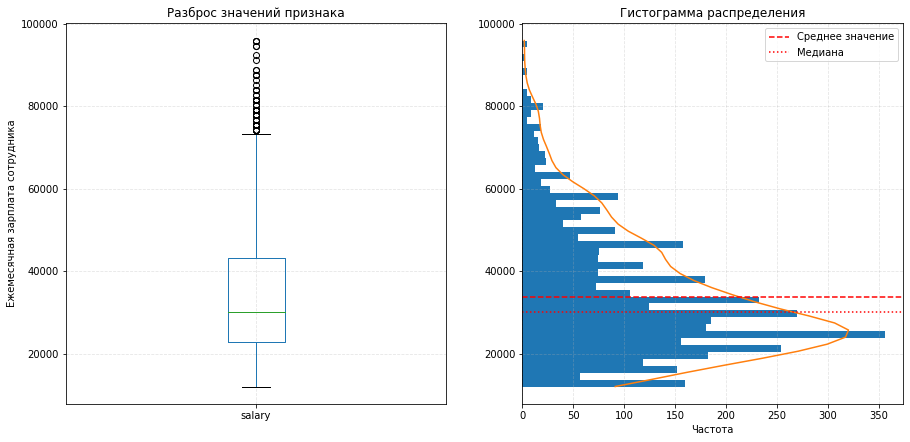

Описательная информация для признака 'salary':
Минимальное значение: 12000.0 	|	Максимальное значение: 96000.0
Среднее значение: 33805.8
Медиана: 30000.0
Межквартильный размах IQR: 20400.0
Границы нормальных значений: от 12000.0 до 73800.0


In [75]:
stat_num(quit_train, 'salary')

**Вывод**
* Распределение признака существенно не отличается от данных представленных для первой задачи.
* Для признака `salary` не наблюдается явно аномальных значений данных
* Присутствуют данные выходящие за нормальных значений (выше 73800), но эти данные не являются ошибочными.
* Наблюдается ассиметрия в распредлении данных.

[Вернуться к оглавлению](#point0)

#### Анализ дискретных числовых и категориальных признаков
##### Признак `dept`
Признак отображает отдел, в котором работает сотрудник.

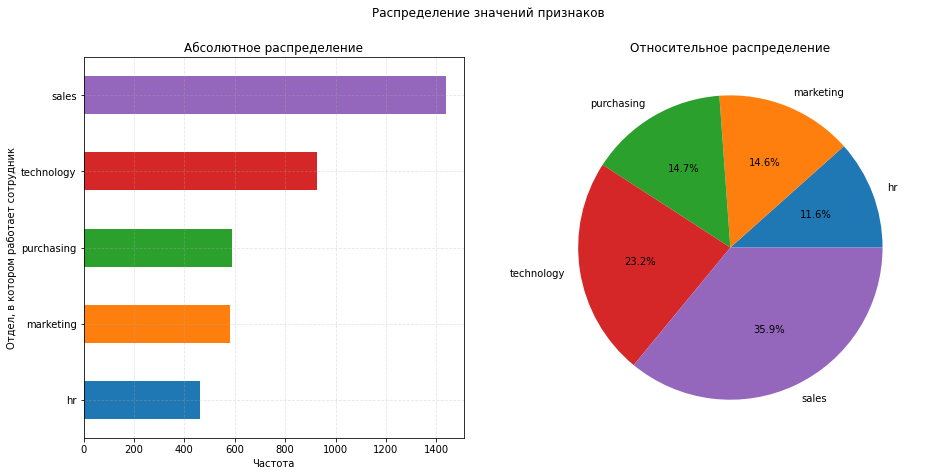

Значения признака 'dept' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 5 ['sales' 'purchasing' 'marketing' 'technology' 'hr']
В том числе:
- sales: 1438 (35.95%)
- purchasing: 588 (14.7%)
- marketing: 582 (14.55%)
- technology: 928 (23.2%)
- hr: 464 (11.6%)


In [76]:
stat_cat(quit_train, 'dept')

**Вывод**:
* Распределение признака существенно не отличается от данных представленных для первой задачи.
* Категориальный номинальный признак.
* Больше всего сотрудников работает в отделе `sales` (36%)
* На втором месте отдел `technology` (23%)
* Далее количество сотрудников по отделам purchasing, marketing, hr плавно уменьшается достигая в последнем доли 11.6%.

[Вернуться к оглавлению](#point0)

##### Признак `level`
Признак отображает уровень занимаемой должности.

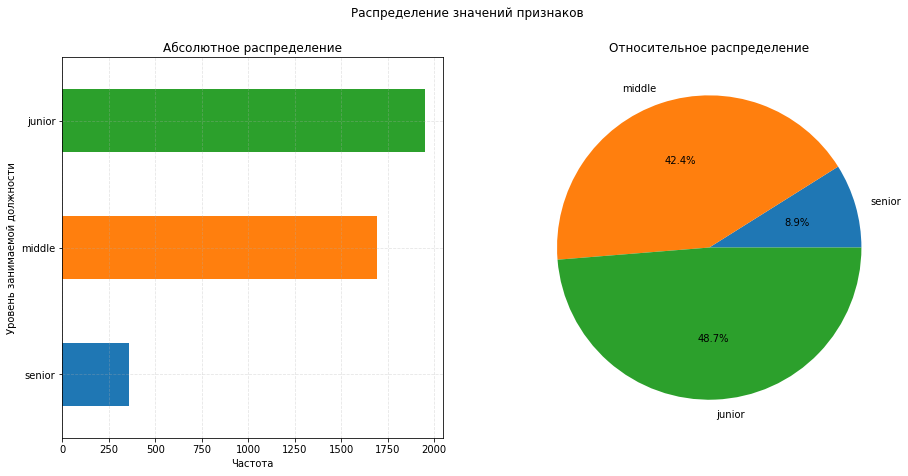

Значения признака 'level' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 3 ['middle' 'junior' 'senior']
В том числе:
- middle: 1694 (42.35%)
- junior: 1949 (48.73%)
- senior: 357 (8.93%)


In [77]:
stat_cat(quit_train, 'level')

**Вывод**:
* Распределение признака существенно не отличается от данных представленных для первой задачи.
* Категориальный ранговый признак.
* Значения в порядке возрастания уровня занимаемой должности: 'junior' > 'middle' > 'senior'
* В компании примерно равное число сотрудников уровня junior и middle - примерно в районе 45% каждой группы. 
* 9% сотрудники уровня senior

[Вернуться к оглавлению](#point0)

##### Признак `workload`
Признак отображает уровень загруженности сотрудника.

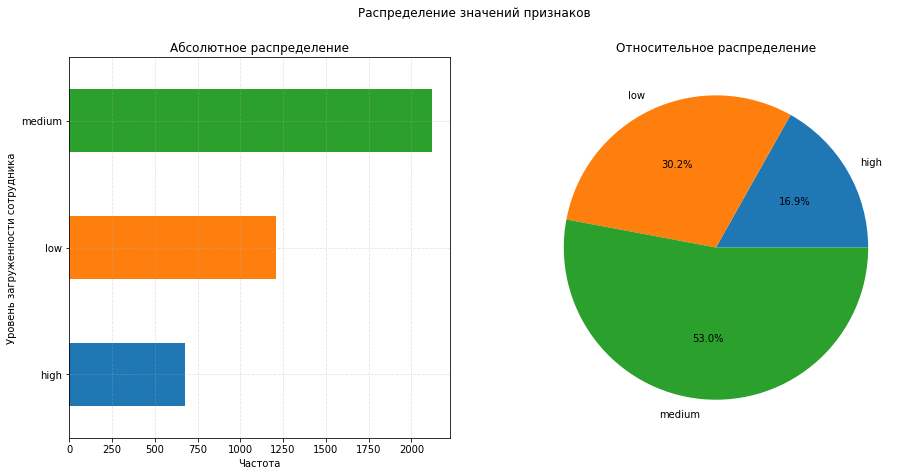

Значения признака 'workload' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 3 ['high' 'medium' 'low']
В том числе:
- high: 674 (16.85%)
- medium: 2118 (52.95%)
- low: 1208 (30.2%)


In [78]:
stat_cat(quit_train, 'workload')

**Вывод**:
* Категориальный ранговый признак.
* Значения в порядке возрастания уровня загруженности: 'low' > 'medium' > 'high'
* Примерно половина сотрудников имеет среднюю загруженность.
* Остальная половина - 30 % с низкой загруженностью, и около 20% с высокой.
* Распределение признака существенно не отличается от данных представленных для первой задачи.

[Вернуться к оглавлению](#point0)

##### Признак `employment_years`
Признак отображает длительность работы в компании (в годах).

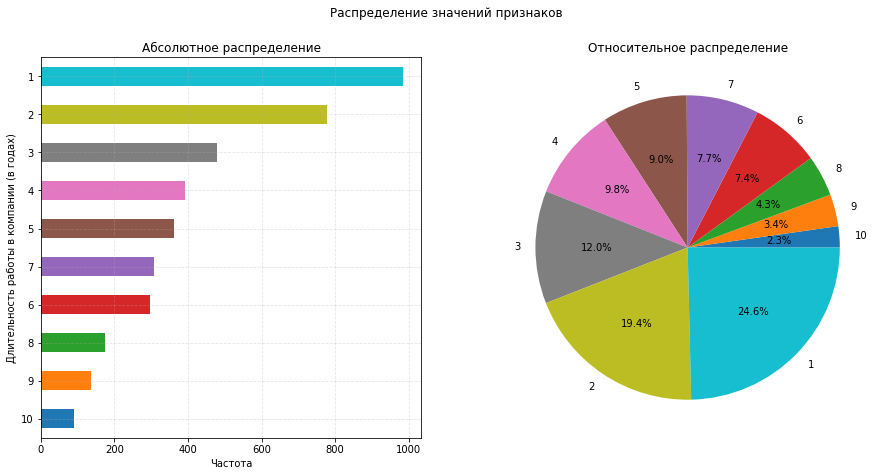

Значения признака 'employment_years' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 10 [ 2  5  1  8  4  7  3  9  6 10]
В том числе:
- 2: 777 (19.43%)
- 5: 362 (9.05%)
- 1: 985 (24.62%)
- 8: 174 (4.35%)
- 4: 393 (9.82%)
- 7: 308 (7.7%)
- 3: 479 (11.97%)
- 9: 136 (3.4%)
- 6: 296 (7.4%)
- 10: 90 (2.25%)


In [79]:
stat_cat(quit_train, 'employment_years')

**Вывод**:
* Числовой дискретный признак.
* Больше всего в компании сотрудников, которые работают первый год - 24%
* Далее число сотрудников плавно уменьшается в согласно хронологическому порядку и для сотрудников с десятилетней длительностью достигает всего 2%.
* Распределение признака существенно не отличается от данных представленных для первой задачи.

[Вернуться к оглавлению](#point0)

##### Признак `last_year_promo`
Признак отображает было ли повышение сотрудника за последний год.

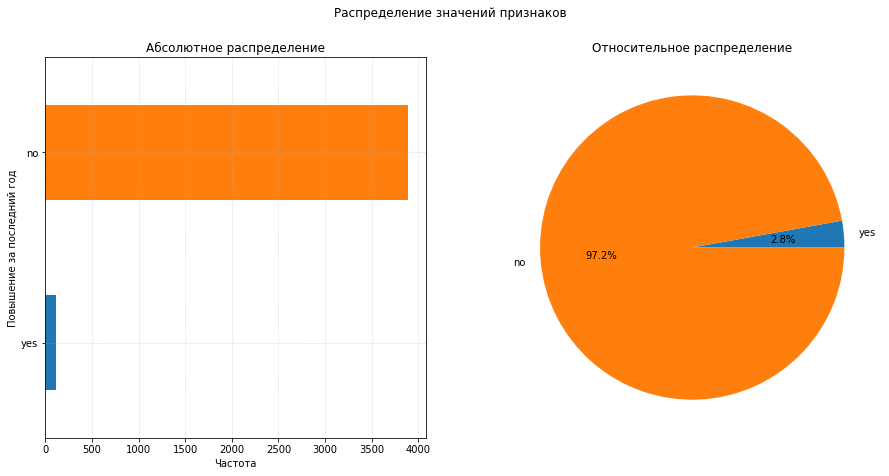

Значения признака 'last_year_promo' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 2 ['no' 'yes']
В том числе:
- no: 3887 (97.17%)
- yes: 113 (2.83%)


In [80]:
stat_cat(quit_train, 'last_year_promo')

**Вывод**:
* Категориальный номинальный признак. Бинарный.
* Также, лишь около 3% сотрудников компании получили повышение за последний год.
* Распределение признака существенно не отличается от данных представленных для первой задачи.

[Вернуться к оглавлению](#point0)

##### Признак `last_year_violations`
Признак показывает - нарушал ли сотрудник трудовой договор за последний год.

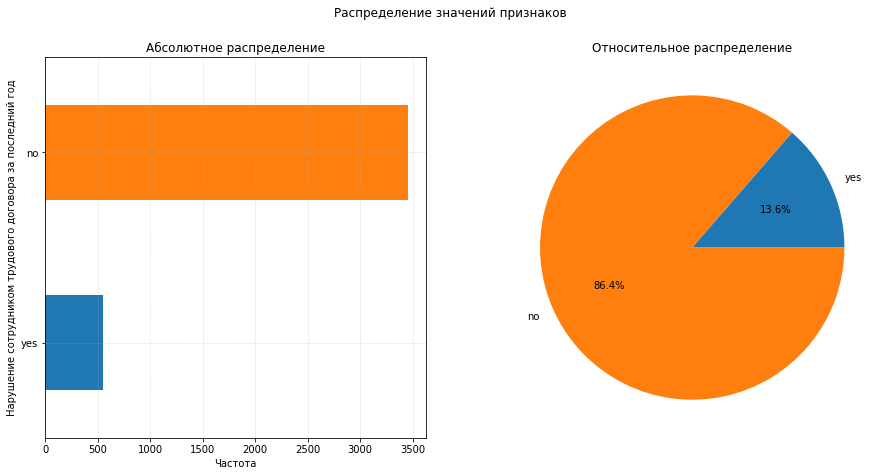

Значения признака 'last_year_violations' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 2 ['no' 'yes']
В том числе:
- no: 3455 (86.38%)
- yes: 545 (13.62%)


In [81]:
stat_cat(quit_train, 'last_year_violations')

**Вывод**:
* Категориальный номинальный признак. Бинарный.
* 13% сотрудников нарушили договор за последний год.
* Распределение признака существенно не отличается от данных представленных для первой задачи.

[Вернуться к оглавлению](#point0)

##### Признак `supervisor_evaluation`
Признак отображает оценку качества работы сотрудника, которую дал руководитель.

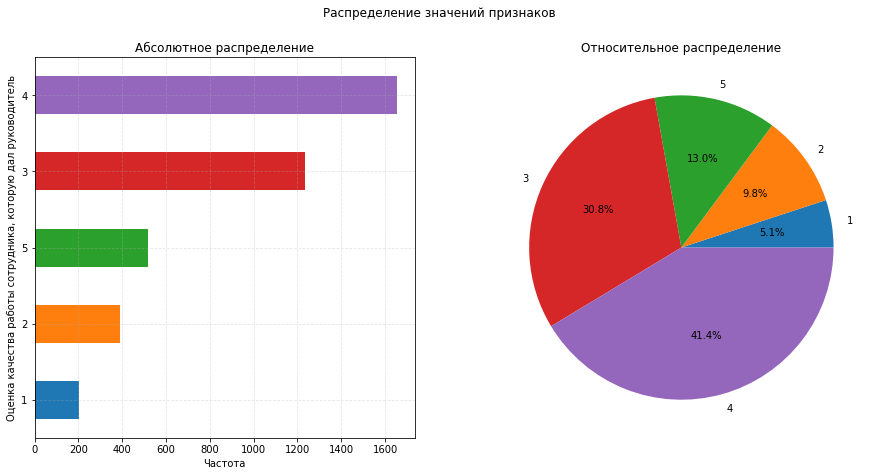

Значения признака 'supervisor_evaluation' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 5 [4 1 3 5 2]
В том числе:
- 4: 1654 (41.35%)
- 1: 202 (5.05%)
- 3: 1233 (30.82%)
- 5: 520 (13.0%)
- 2: 391 (9.78%)


In [82]:
stat_cat(quit_train, 'supervisor_evaluation')

**Вывод**:
* Числовой дискретный признак.
* Больше всего сотрудников с оценкой качества 4 (40%) - в целом это хорошо. А самое небольшое число сотрудников имеют низшую оценку 1 (5%).
* Подобная картина невольно задает вопрос о распределении оценок и о возможности улучшения показателей.
* Распределение признака существенно не отличается от данных представленных для первой задачи.

[Вернуться к оглавлению](#point0)

##### Признак `quit`
Признак отображает факт увольнения сотрудника из компании.<br>
Это <font color='red'>целевой признак</font>.

Отобразим распределение признака для обучающих и тестовых данных:

Обучающие данные:


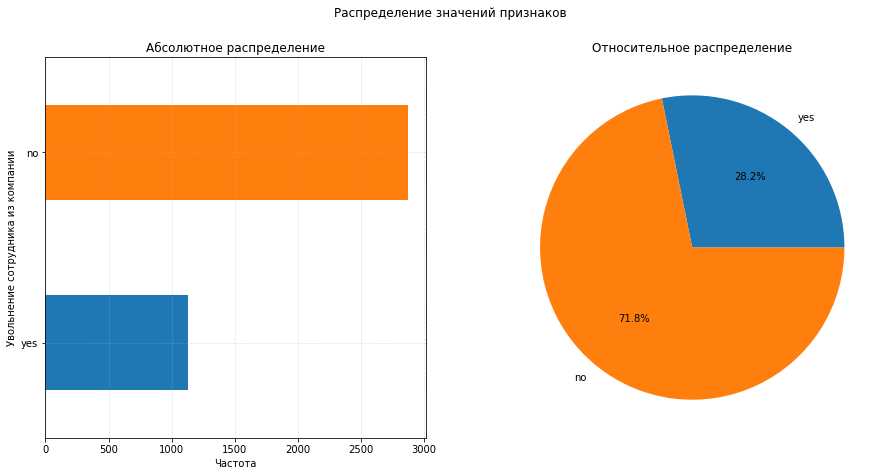

Значения признака 'quit' распределены следующим образом:
- Всего значений: 4000
- Уникальных значений: 2 ['no' 'yes']
В том числе:
- no: 2872 (71.8%)
- yes: 1128 (28.2%)

Тестовые данные:


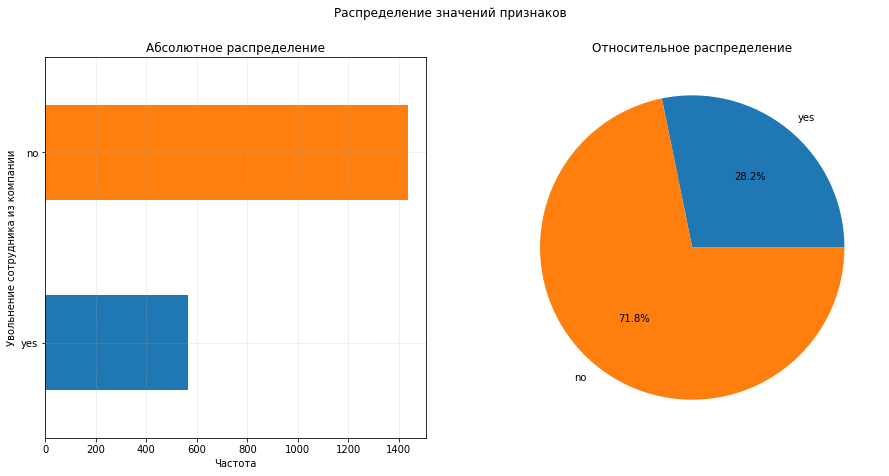

Значения признака 'quit' распределены следующим образом:
- Всего значений: 2000
- Уникальных значений: 2 ['yes' 'no']
В том числе:
- yes: 564 (28.2%)
- no: 1436 (71.8%)


In [83]:
print("Обучающие данные:")
stat_cat(quit_train, 'quit')
print("\nТестовые данные:")
stat_cat(target_quit_test, 'quit')

**Вывод**:
* Распределение целевого признака `quit` для *обучающих* и *тестовых* данных существенно не отличается.
* Около 30% сотрудников компании уволились - подобная цифра безусловно требует рассмотрения и предложения мер по улучшению ситуации.

[Вернуться к оглавлению](#point0)

#### Портрет типичного «уволившегося сотрудника»

Отобразим как распределяются категориальные и числовые дискретные признаки в зависимости от факта увольнения сотрудника из компании.  

<div style="border:solid orange 2px; padding: 20px">
<font color='red'>*</font> <i>Примечание</i>: на графиках распределения категориальных и числовых дискретных признаков указано процентное соотношение <ins>уволившихся сотрудников</ins> от числа <ins>неуволившихся</ins>.

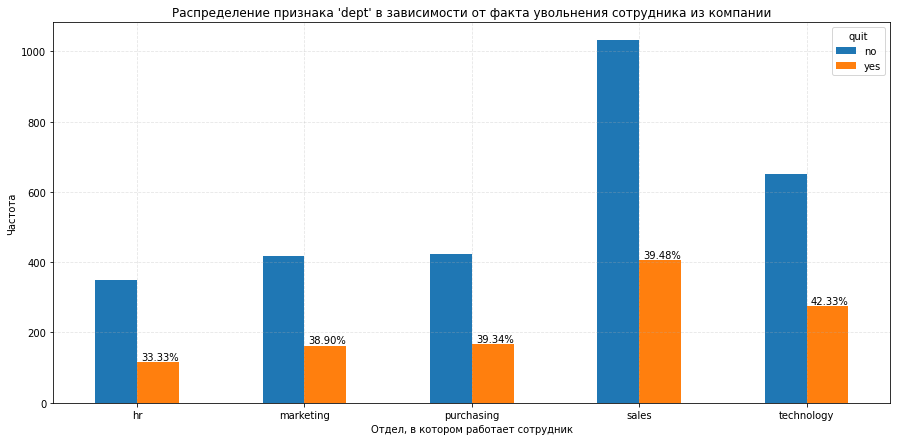

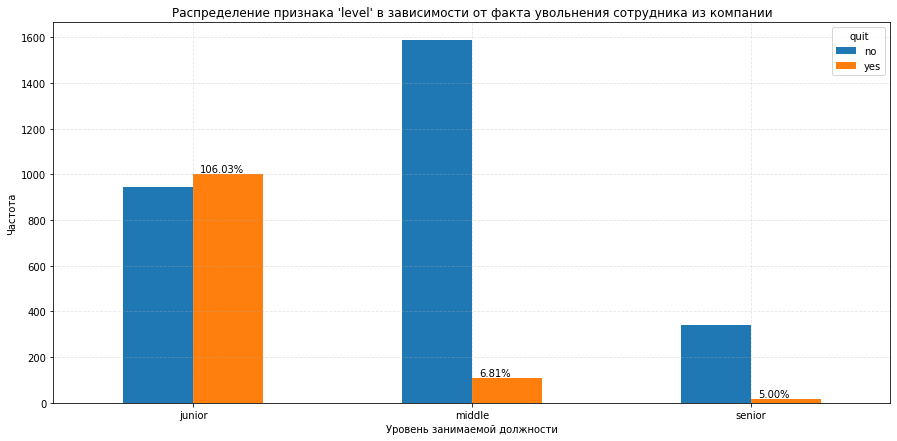

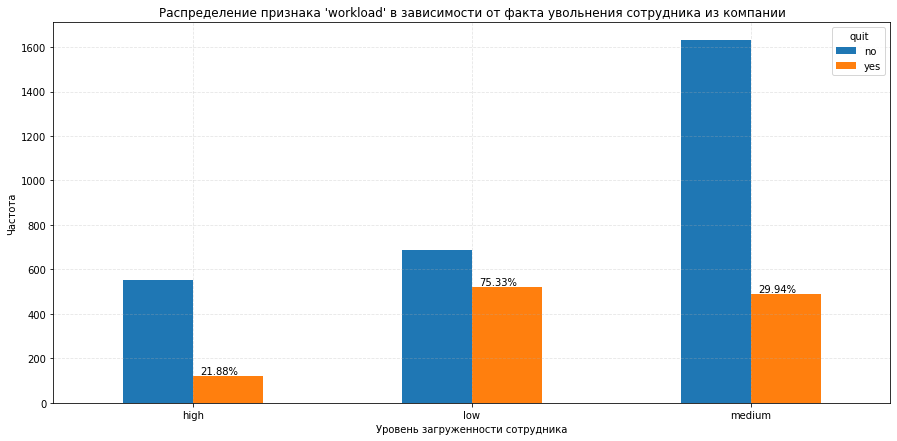

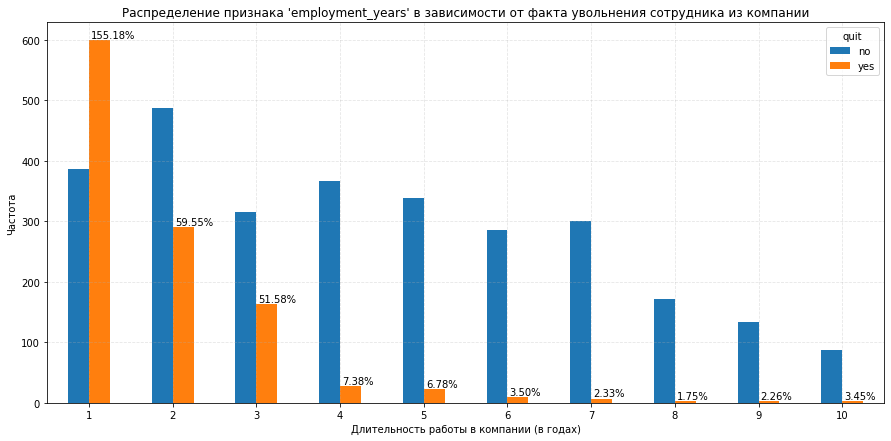

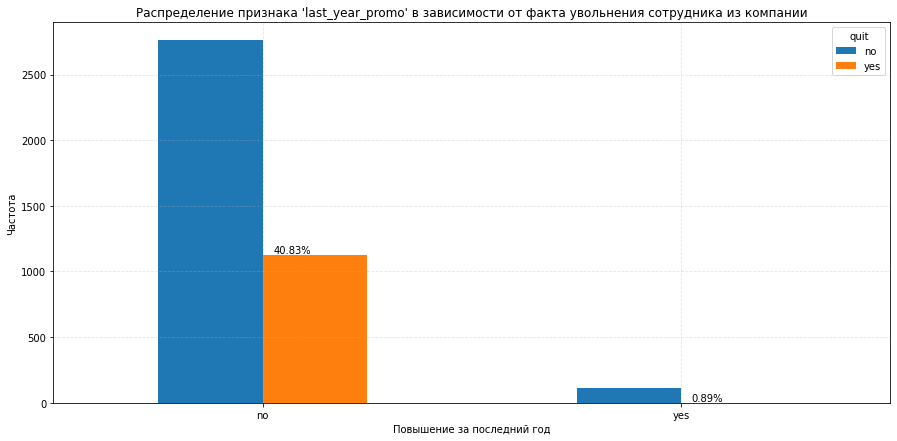

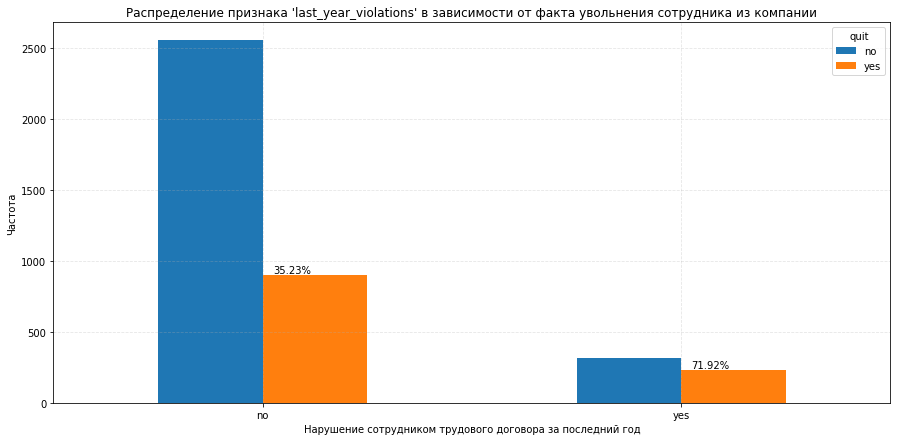

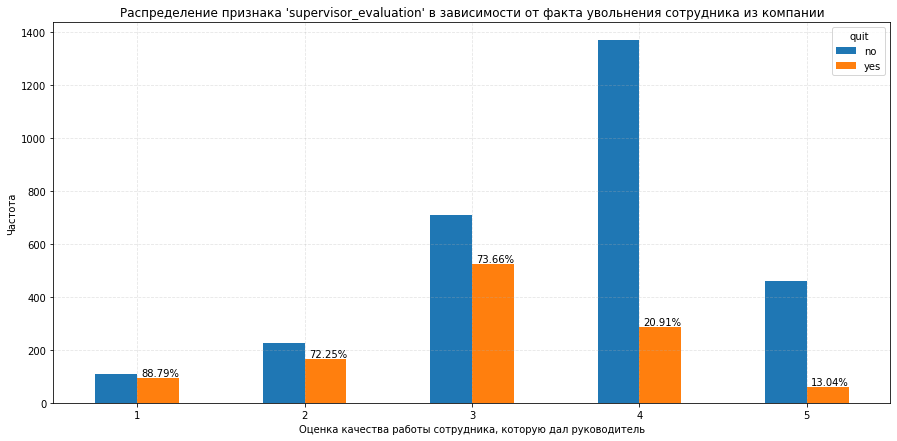

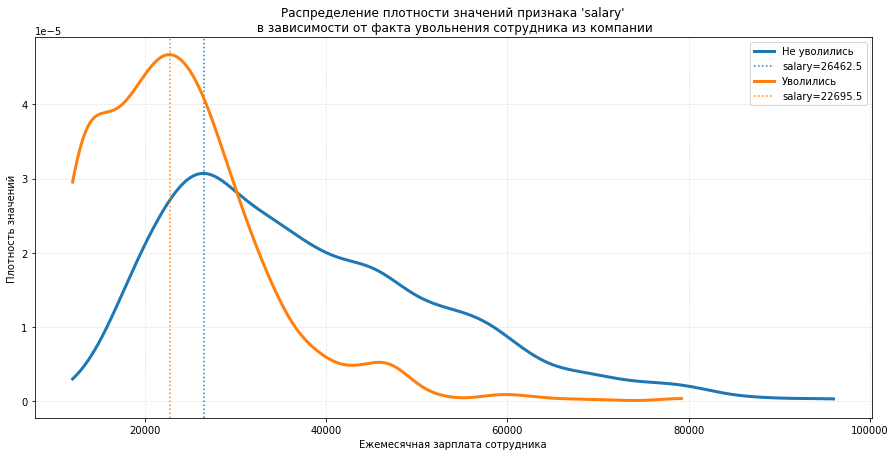

In [84]:
# Категориальные и числовые дискретные признаки:
for feature in ['dept', 'level', 'workload', 'employment_years', 
                'last_year_promo', 'last_year_violations', 'supervisor_evaluation']:
    compare_cat(quit_train, feature)

# Числовые непрерывные признаки:
compare_num(quit_train, 'salary')

**Вывод**:
* **Отдел, в котором работает сотрудник** практически не оказывает влияние на то уволится он или нет. Для всех отдельно относительная доля уволившихся около 40%, где-то больше, где-то меньше но с незначительной разницей.
* **Уровень занимаемой должности**. Существенно влияет на увольнение. Доля уволившихся для уровня 'junior' 106% - то есть больше половины junior-сотрудников увольняются. При повышении уровня должности процент увольнения резко уменьшается, достигая для middle около 7% и 5% - для senior.
* Заметна разница количества увольнения от **уровня загруженности сотрудника**. Самая большая доля уволившихся с низкой загруженностью - 75%. Для низкой и средней загрузки число уволившихся примерно одинаков, однако за счет большей численности для среднезагруженных сотрудников - там доля увольнений составляет лишь 30%. Для высокой загрузки число увольнений невелико в абсолютных, и в относительных единицах - около 22%.
* **Длительность работы в компании (в годах)** оказывает влияние на факт увольнения. 2/3 от всех сотрудников-первогодок увольняются. Для второго года - количество уволившихся 60% от числа неуволившихся. Далее эта доля плавно снижается достигая 3% для сотрудников с 10-летним стажем.
* **Повышение**. Из тех сотрудников, кто не получил повышение доля процент уволившихся от оставшихся составляет 40%. А для тех кто получил повышение - лишь 0.89%. Но здесь следует сделать акцент на том, что повышение получили лишь 3% сотрудников, поэтому распределение не достаточно показательное.
* **Нарушение трудового договора**. В относительном выражении чаще увольняются сотрудники которые нарушили договор (70% от тех кто не нарушил). Но в абсолютных единицах число уволившихся больше среди тех, кто не нарушал.
* **Оценка качества работы**. Можно заключить, что оценка руководителя адекватно оценивает шанс на увольнение.  Почти половина сотрудников получивших "1" увольняются.  И наоборот - из тех кто получил "5" доля уволившихся составляет 13%.
* **Ежемесячная зарплата сотрудника**. В распределении значений зарплаты для уволившихся сотрудников и неуволившихся заметна разница: пик значений для тех кто уволился приходится примерно на 22700, против 26500 для тех кто остался. Но отметим, что в абсолютных величинах эта разница не столь существенная.
* Таким образом, резюмируем. Уволившийся сотрудник как правило:
  * может работать  в любом отделе
  * имеет уровень занимаемой должности 'junior' 
  * имеет низкий уровень загруженности 
  * работает в компании первый год
  * скорее всего не получал повышение 
  * скорее всего нарушал трудовой договор
  * имеет низкую оценку качества работы 
  * имеет среднюю зарплату не сильно отличающуюся от других - в районе 22700

[Вернуться к оглавлению](#point0)

#### Анализ взаимозависимости признаков `job_satisfaction_rate` и `quit`
Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник.

Проверим это утверждение сравнив распределение признака `job_satisfaction_rate` для ушедших и оставшихся сотрудников.

Для начала я создам набор данных `data_quit` включающий два целевых признака: `job_satisfaction_rate` и `quit`. 

Индексы этих признаков идентичны - мы убедились в этом на этапе предобработки данных - поэтому их без проблем можно соединить.

In [85]:
data_quit = job_satisfaction_rate_target_test.join(target_quit_test)
data_quit.head()

,job_satisfaction_rate,quit
id,,
130604,0.74,no
825977,0.75,no
418490,0.60,yes
555320,0.72,no
826430,0.08,yes


Построим графики распределения плотности значний признака `job_satisfaction_rate` для ушедших и оставшихся сотрудников.

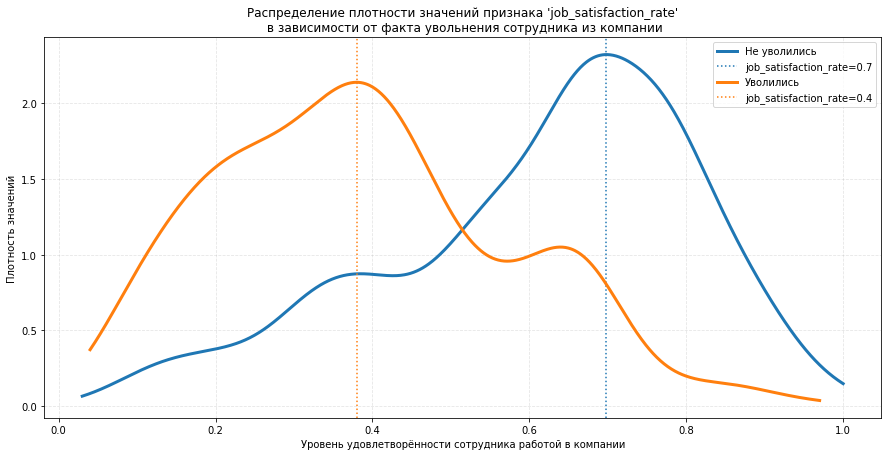

In [86]:
compare_num(data_quit, 'job_satisfaction_rate')

Рассчитаем средние значения `job_satisfaction_rate` для ушедших и оставшихся сотрудников:

In [87]:
pd.pivot_table(data_quit, index='quit', values='job_satisfaction_rate')

,job_satisfaction_rate
quit,
no,0.61
yes,0.39


**Вывод**:
* На основе графического анализа, а также сравнения средних значений уровня удовлетворённости сотрудников работой можно заключить, что этот признак влияет на увольнение.

[Вернуться к оглавлению](#point0)

### Добавление нового входного признака

Как мы смогли убедиться выше, признаки `job_satisfaction_rate` и `quit` действительно имеют взаимосвязь. 

Поскольку, при [решении первой задачи](#Оценка-качества-модели-на-тестовых-данных) удалось подобрать модель с метрикой удовлетворяющей критерию успеха ($SMAPE ≤ 15$), можно добавить признак `job_satisfaction_rate` ко входным признакам второй задачи.

Для добавления признака к тренировочным данным необходимо получить прогнозные значения `job_satisfaction_rate` на основе имеющихся признаков:

In [88]:
# установка переменной со входными признаками:
X = quit_train.drop('quit', axis=1)

# получение предсказаний на основе входных признаков:
y_pred = grid_search_reg.predict(X)

# добавление предсказанного признака в датасет quit_train:
quit_train['job_satisfaction_rate'] = y_pred

# отображение первых 5 строк:
quit_train.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
id,,,,,,,,,,
723290,sales,middle,high,2,no,no,4,54000,no,0.56
814010,sales,junior,medium,2,no,no,4,27600,no,0.84
155091,purchasing,middle,medium,5,no,no,1,37200,no,0.30
257132,sales,junior,medium,2,no,yes,3,24000,yes,0.28
910140,marketing,junior,medium,2,no,no,5,25200,no,0.74


Для тестовой выборки признак `job_satisfaction_rate` можно взять из имеющихся данных (датасет `job_satisfaction_rate_target_test`). Для этого сформируем новый датасет `features_test_new`:

In [89]:
features_test_new = features_test.join(job_satisfaction_rate_target_test)
features_test_new.head()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
id,,,,,,,,,
485046,marketing,junior,medium,2,no,no,5,28800,0.79
686555,hr,junior,medium,1,no,no,4,30000,0.72
467458,sales,middle,low,5,no,no,4,19200,0.64
418655,sales,middle,low,6,no,no,4,19200,0.60
789145,hr,middle,medium,5,no,no,5,40800,0.75


**Вывод**:
* В обучающие признаки добавлен новый признак `job_satisfaction_rate`, полученный путем прогноза модели найденной при решении первой задачи.

[Вернуться к оглавлению](#point0)

### Корреляционный анализ

Отобразим матрицу диаграмм рассеяния для количественных признаков. 

Кодировка цветов на диаграммах:

Цвет|Увольнение сотрудника
-|:-
<font color='#1f77b4' size='6'>●</font>|Нет
<font color='red' size='6'>●</font>|Да

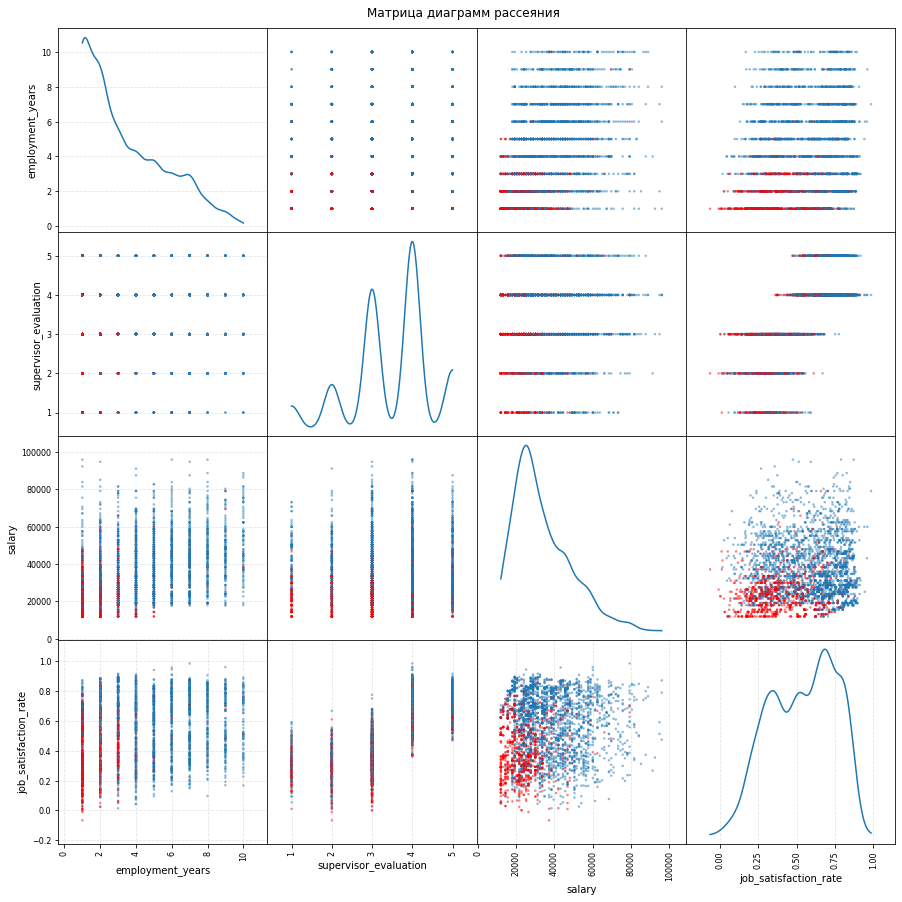

In [90]:
# задание цветовой карты:
colormap = np.where(quit_train['quit'] == 'no', '#1f77b4', 'red')

# отрисовка матрицы диаграмм рассеяния, 
pd.plotting.scatter_matrix(quit_train, c=colormap, s=25, alpha=0.5, 
                           figsize=(15, 15), diagonal='kde', range_padding=0.3)
plt.suptitle("Матрица диаграмм рассеяния", y=0.9)
plt.show()

Сформируем матрицу корреляции со значениями $\phi_{k}$ для наших данных.

In [91]:
# создаём список с наименованиями непрерывных признаков:
interval_cols = ['salary', 'job_satisfaction_rate']

# формируем матрицу корреляции:
phik_overview_clf = quit_train.phik_matrix(interval_cols=interval_cols)
phik_overview_clf

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit,job_satisfaction_rate
dept,1.00,0.00,0.00,0.00,0.00,0.04,0.04,0.28,0.00,0.15
level,0.00,1.00,0.48,0.69,0.11,0.00,0.01,0.75,0.31,0.08
workload,0.00,0.48,1.00,0.21,0.04,0.01,0.00,0.79,0.13,0.07
employment_years,0.00,0.69,0.21,1.00,0.16,0.00,0.00,0.49,0.66,0.37
last_year_promo,0.00,0.11,0.04,0.16,1.00,0.00,0.03,0.22,0.16,0.17
last_year_violations,0.04,0.00,0.01,0.00,0.00,1.00,0.18,0.09,0.19,0.57
supervisor_evaluation,0.04,0.01,0.00,0.00,0.03,0.18,1.00,0.06,0.25,0.79
salary,0.28,0.75,0.79,0.49,0.22,0.09,0.06,1.00,0.56,0.18
quit,0.00,0.31,0.13,0.66,0.16,0.19,0.25,0.56,1.00,0.52
job_satisfaction_rate,0.15,0.08,0.07,0.37,0.17,0.57,0.79,0.18,0.52,1.00


Отобразим матрицу корреляции в виде тепловой карты:

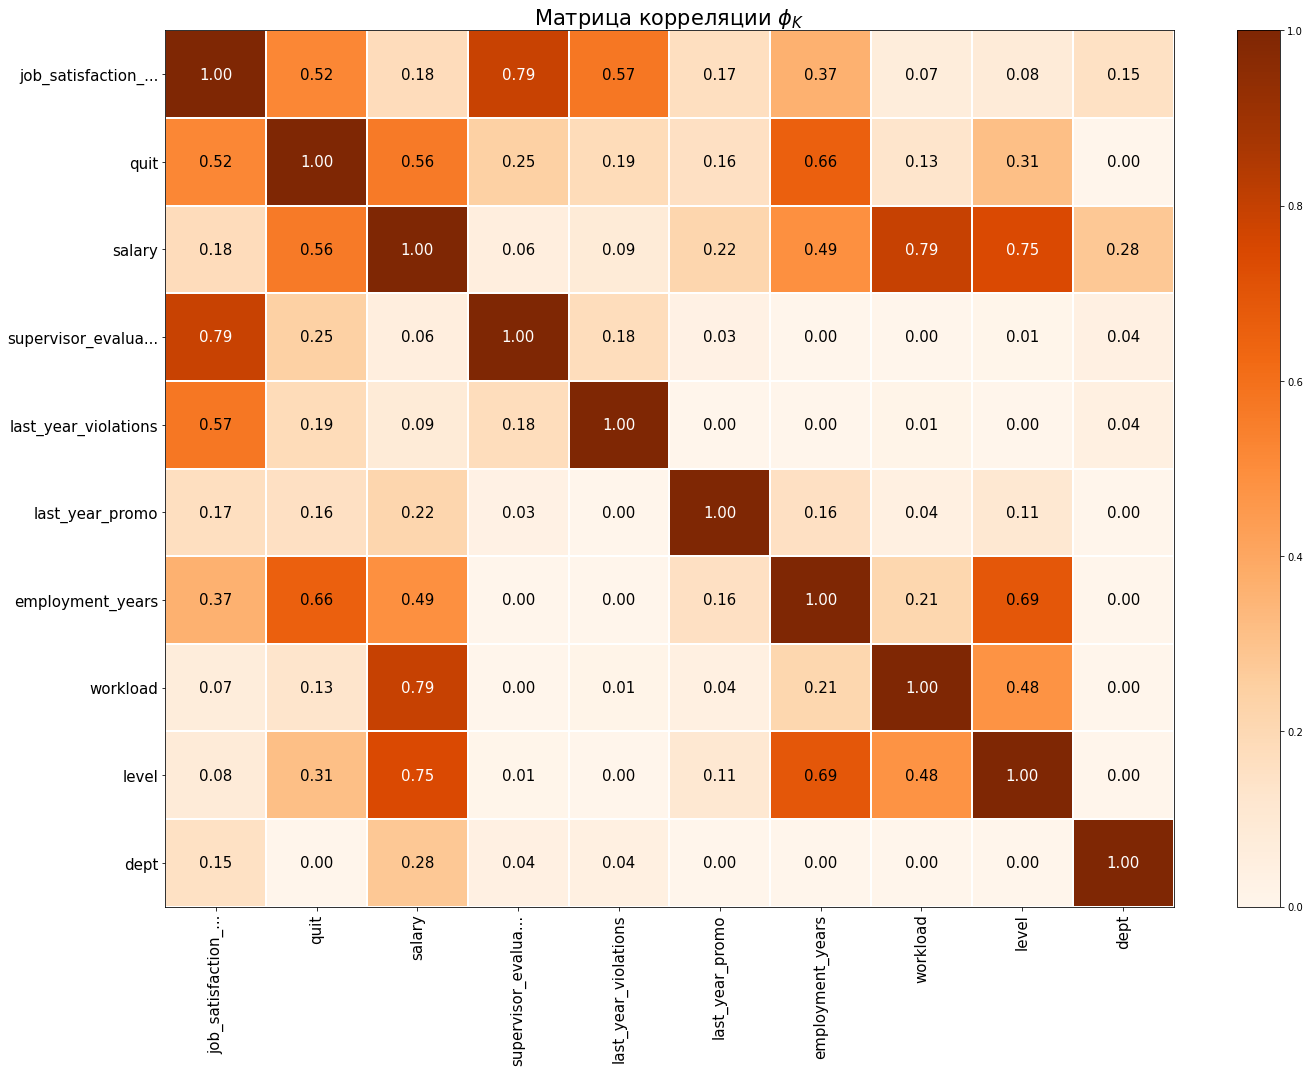

In [92]:
phi_heatmap(phik_overview_clf)

Проверим признаки на наличие мультиколлинеарности.

In [93]:
# список для фиксации количества превышений phi >= 0.9:
phi_list = []

# перебор признаков phik_overview:
for c in phik_overview_clf.columns:
    high_phi_values = len(phik_overview_clf[phik_overview_clf[c] >= 0.9].drop(c))
    
    # добавляем значения: [признак, количество превышений]
    phi_list.append([c, high_phi_values])

# отображаем данные в виде датафрейма:
df_phi = pd.DataFrame(data=phi_list, columns=['Признак', 'Количество превышений'])
display(df_phi)

# выводим итог:
print(f"Всего признаков с мультиколлинеарностью: {df_phi[df_phi['Количество превышений'] > 0].shape[0]}")

,Признак,Количество превышений
0,dept,0
1,level,0
2,workload,0
3,employment_years,0
4,last_year_promo,0
5,last_year_violations,0
6,supervisor_evaluation,0
7,salary,0
8,quit,0
9,job_satisfaction_rate,0


Всего признаков с мультиколлинеарностью: 0


А также проверим какие признаки показывают очень слабую корреляцию с целевым признаком ($\phi_k < 0.1$):

In [94]:
low_phi = phik_overview_clf[phik_overview_clf['quit'] < 0.1]
display(pd.DataFrame(low_phi['quit']))
print(f'Всего признаков с низкой корреляцией с целевым признаком - {low_phi.shape[0]}:')
print(low_phi.index.to_list())

,quit
dept,0.00


Всего признаков с низкой корреляцией с целевым признаком - 1:
['dept']


**Вывод**: 
* В имеющемся наборе данных отсутствуют признаки с мультиколлинеарностью ($\phi_k \geq 0.9$)
* В имеющемся наборе данных явно не наблюдается утечка данных.
* Признак `dept` показывают низкую степень корреляции с целевым признаком.

[Вернуться к оглавлению](#point0)

### Подготовка данных
Для решения задачи классификации имеем следующий набор данных:

**Целевой признак**:
`quit` - отображается увольнение сотрудника из компании.

**Числовые непрерывные признаки**:
* `salary` - ежемесячная зарплата сотрудника
* `job_satisfaction_rate` - уровень удовлетворённости сотрудника работой в компании. Непрерывный числовой признак. Значения распределяются от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён.

**Числовые дискретные признаки**:
* `employment_years` - длительность работы в компании (в годах).
* `supervisor_evaluation` - оценка качества работы сотрудника, которую дал руководитель.

**Категориальные бинарные признаки**:
* `last_year_promo` - показывает, было ли повышение за последний год.
* `last_year_violations` - показывает, нарушал ли сотрудник трудовой договор за последний год.

**Категориальные номинальные признаки**:
* `dept` -  отдел, в котором работает сотрудник.

**Категориальные ранговые признаки**:
* `level` - уровень занимаемой должности.
* `workload` - уровень загруженности сотрудника.

От набора обучающих признаков из прошлой задачи отличие только в добавленном признаке `job_satisfaction_rate`.

Сформируем переменные для обучающих и целевого признака. Для тестовых данных применим сортировку индексов:

In [95]:
# формирование переменных обучающих признаков:
X_train = quit_train.drop('quit', axis=1)
X_test  = features_test_new.sort_index()

# формирование переменных целевого признаков:
y_train = quit_train['quit']
y_test  = target_quit_test.sort_index()['quit']

Закодируем строковые классы целевого признака числами — так вычисления выполнятся быстрее. Сделать это можно с помощью кодировщика **LabelEncoder**. Он переведёт строковые значения целевого признака в порядковые числа.

Создаем экземпляр класса **LabelEncoder** для кодирования целевого признака:

In [96]:
label_encoder = LabelEncoder()

Обучаем модель и трансформируем выборки:

In [97]:
y_train = label_encoder.fit_transform(y_train)
y_test  = label_encoder.fit_transform(y_test)

Проверим как закодировались значения:

In [98]:
print("y_train:")
for i in np.unique(y_train):
    print(i, label_encoder.inverse_transform([i]))
print("\ny_test:")
for i in np.unique(y_test):
    print(i, label_encoder.inverse_transform([i]))

y_train:
0 ['no']
1 ['yes']

y_test:
0 ['no']
1 ['yes']


Кодирование целевого признака прошло согласно схеме:

Значение|Код
-|-
'no'|0
'yes'|1

Перейдем к подготовке обучающих признаков. 

Необходимо сформировать списки, где будут обозначены типы кодирования и масштабирования признаков.

In [99]:
# числовые признаки для масштбирования:
num_columns = X_train.select_dtypes(exclude='object').columns.tolist() 

# признаки OneHotEncoder-кодирования:
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']  

# признаки OrdinalEncoder-кодирования:
ord_columns = ['level', 'workload']  

Поскольку отличий в категориальных признаках нет, этапы пайплайна предобработки `ohe_pipe` и `ord_pipe` остаются без изменений. 

Создаём общий пайплайн для подготовки данных:

In [100]:
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ],
    remainder='passthrough'
)

**Вывод**:
* Обозначили пайплайн подготовки данных для задачи классификации.
* Числовые признаки имеют разный масштаб данных, поэтому при обучении модели требуется применить масштабирование.
* Категориальный номинальный признак (`dept`), а также категориальные бинарные признаки (`last_year_promo`, `last_year_violations`) закодированы при помощи **OneHotEncoder**.
* Категориальные ранговые признаки (`level`, `workload`) закодированы при помощи **OrdinalEncoder**.
* Заполнение пропусков категориальных данных осуществляется с помощью **SimpleImputer**.

[Вернуться к оглавлению](#point0)

### Обучение моделей
#### Создание пайплайна

Создаём итоговый пайплайн: подготовка данных и модель. В качестве модели по умолчанию - задаем DecisionTreeClassifier:

In [101]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

Создаем сетку, содержающую набор моделей и их гиперпараметров. 

Исследуются модели:

Название модели|Гиперпараметры
-|:-
KNeighborsClassifier|n_neighbors: [2,5,9]
DecisionTreeClassifier|max_depth: [2,4,6],    max_features: [2,6,10]
LogisticRegression|C: [0.1,0.5,1,10]
SVC|C: [1,8],    gamma: ['scale', 'auto']
    
Ко всем моделям применяются методы масштабирования числовых признаков **StandardScaler** и **MinMaxScaler**.

> <font color='red'>*</font> *Примечание*: значения гиперпаметров получены путем перебора значений для каждой модели и выбора из всех значений некой комбинации обеспечивающей высокое значение метрики. Для финальной сетки оставил небольшое число вариаций с целью сократить время на обучения модели.

In [102]:
param_grid = [
    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': [2,5,9],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': [2,4,6],
        'models__max_features': [2,6,10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': [0.1,0.5,1,10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, kernel='rbf', probability=True)], 
        'models__C': [1,8],
        'models__gamma': ['scale', 'auto'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
}
]

Создаем пайплайн с приминением автоматизированного поиска гиперпараметров **GridSearchCV**:
* Установка модели пайплайна по умолчанию `pipe_final`.
* Применение заданной сетки гиперпараметров моделей `param_grid`.
* `cv=5` - применяется кросс-валидация из 5 блоков
* `scoring='roc_auc'` - в качестве метрики качества моделей используется ROC-AUC. Выбор в пользу данной метрики обуславливается поставленной задачей, структурой и качеством данных:
  * Для задачи классификации увольнения сотрудника метрика ROC-AUC отлично подходит, поскольку она оценивает качество решений модели в наиболее общем виде, учитывая все возможные пороговые значения.
  * ROC-AUC показывает, насколько хорошо модель различает между положительными и отрицательными классами, учитывая баланс между ложными срабатываниями и пропусками.
  * ROC-AUC позволяет сравнивать различные модели на одном и том же наборе данных, помогая выбрать лучшую модель для конкретной задачи.
  * Метрика ROC-AUC подходит для бинарной классификации с дисбалансом по классам
* `n_jobs=-1` - количество вычислительных мощностей (чтобы считалось быстрее, указывают `-1`)

In [103]:
grid_search_clf = GridSearchCV(
    pipe_final,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

[Вернуться к оглавлению](#point0)

#### Поиск лучшей модели
Запускаем пайплайн на тренировочных данных:

In [104]:
grid_search_clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['dept',
                                                                          'last_year_promo',
                                                                          'last_year_violations']),
                                                                        ('ord',
                                                                         Pipeline(...
                         {'models': [LogisticRegression(penalty='l1',
                                                        random_state=42,
                                                        solver='liblinear')],
                          'models__C': [0.1, 0.5, 1, 10],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']},
                         {'models': [SVC(probability=True, random_state=42)],
                          'models__C': [1, 8],
                          'models__gamma': ['scale', 'auto'],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

Отобразим параметры лучшей модели и полученную метрику на кросс-валидации:

In [105]:
print('Лучшая модель и её параметры:\n', grid_search_clf.best_estimator_)
print('Метрика лучшей модели на кросс-валидации:', grid_search_clf.best_score_)

Лучшая модель и её параметры:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['dept', 'last_year_promo',
                                                   'last_year_violations']),
                                                 ('ord',
                             

Отобразим 10 лучших результатов среди исследуемых моделей:

In [106]:
result_clf = pd.DataFrame(grid_search_clf.cv_results_).sort_values('rank_test_score')[
        ['rank_test_score', 'param_models', 'mean_test_score','mean_fit_time','params']
]
result_clf['param_models'] = result_clf['param_models'].astype('str').str.replace('\(.*','', regex=True)
result_clf.head(10).style.format({'mean_test_score': '{:.4f}'})

,rank_test_score,param_models,mean_test_score,mean_fit_time,params
58,1,SVC,0.9321,0.722205,"{'models': SVC(probability=True, random_state=42), 'models__C': 8, 'models__gamma': 'auto', 'preprocessor__num': MinMaxScaler()}"
52,2,SVC,0.9286,0.813721,"{'models': SVC(probability=True, random_state=42), 'models__C': 1, 'models__gamma': 'auto', 'preprocessor__num': MinMaxScaler()}"
49,3,SVC,0.9269,0.709919,"{'models': SVC(probability=True, random_state=42), 'models__C': 1, 'models__gamma': 'scale', 'preprocessor__num': MinMaxScaler()}"
6,4,KNeighborsClassifier,0.9264,0.022646,"{'models': KNeighborsClassifier(), 'models__n_neighbors': 9, 'preprocessor__num': StandardScaler()}"
57,5,SVC,0.9262,0.742483,"{'models': SVC(probability=True, random_state=42), 'models__C': 8, 'models__gamma': 'auto', 'preprocessor__num': StandardScaler()}"
48,6,SVC,0.9247,0.733108,"{'models': SVC(probability=True, random_state=42), 'models__C': 1, 'models__gamma': 'scale', 'preprocessor__num': StandardScaler()}"
51,7,SVC,0.9241,0.716429,"{'models': SVC(probability=True, random_state=42), 'models__C': 1, 'models__gamma': 'auto', 'preprocessor__num': StandardScaler()}"
55,8,SVC,0.9237,0.724605,"{'models': SVC(probability=True, random_state=42), 'models__C': 8, 'models__gamma': 'scale', 'preprocessor__num': MinMaxScaler()}"
54,9,SVC,0.9237,0.830816,"{'models': SVC(probability=True, random_state=42), 'models__C': 8, 'models__gamma': 'scale', 'preprocessor__num': StandardScaler()}"
25,10,DecisionTreeClassifier,0.9223,0.021581,"{'models': DecisionTreeClassifier(random_state=42), 'models__max_depth': 4, 'models__max_features': 10, 'preprocessor__num': MinMaxScaler()}"


Также отобразим таблицу с лучшими результатами исследуемых моделей:

In [107]:
best_scores_clf = (result_clf.loc[result_clf.groupby('param_models')['mean_test_score'].idxmax()]
               .sort_values(by='rank_test_score'))
best_scores_clf.style.format({'mean_test_score': '{:.4f}'})

,rank_test_score,param_models,mean_test_score,mean_fit_time,params
58,1,SVC,0.9321,0.722205,"{'models': SVC(probability=True, random_state=42), 'models__C': 8, 'models__gamma': 'auto', 'preprocessor__num': MinMaxScaler()}"
6,4,KNeighborsClassifier,0.9264,0.022646,"{'models': KNeighborsClassifier(), 'models__n_neighbors': 9, 'preprocessor__num': StandardScaler()}"
25,10,DecisionTreeClassifier,0.9223,0.021581,"{'models': DecisionTreeClassifier(random_state=42), 'models__max_depth': 4, 'models__max_features': 10, 'preprocessor__num': MinMaxScaler()}"
38,21,LogisticRegression,0.9171,0.186928,"{'models': LogisticRegression(penalty='l1', random_state=42, solver='liblinear'), 'models__C': 0.1, 'preprocessor__num': 'passthrough'}"


Отобразим графически значения метрик, а также среднего времени обучения моделей.

<div style="border:solid orange 2px; padding: 20px">
<font color='red'>*</font> <i>Примечание</i>: поскольку разница значений метрик довольно незначительна, я изменил диапазон значений шкалы метрики: от 0.915 до 0.935. Следует это учесть при визуальной оценке.

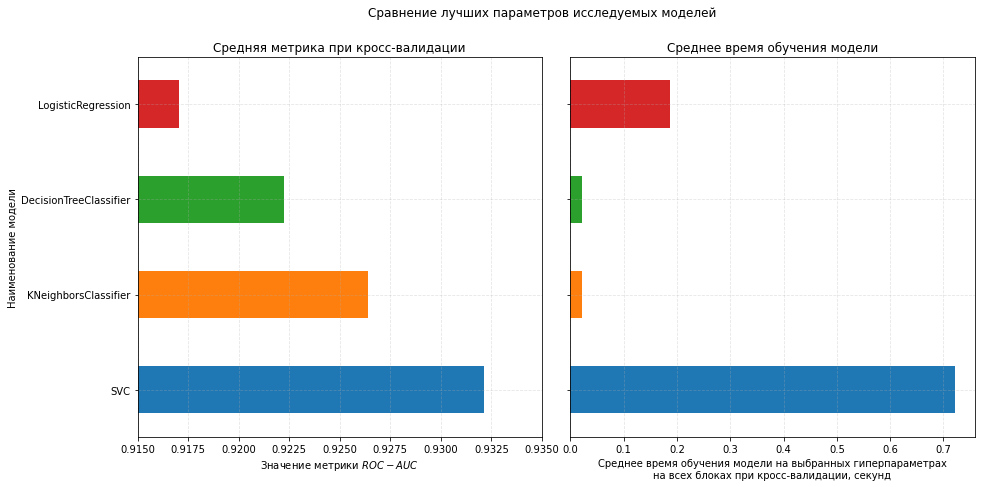

Метрика лучшей модели SVC (0.93) на 0.62% лучше метрики модели KNeighborsClassifier (0.93)
Среднее время на обучение модели SVC (0.722) в 32 раз больше модели KNeighborsClassifier (0.023)


In [108]:
models_compare(best_scores_clf, 'clf')

[Вернуться к оглавлению](#point0)

#### Оценка качества модели на тестовых данных
Рассчитаем метрику лучшей модели на тренировочных данных:

In [109]:
y_test_pred = grid_search_clf.predict_proba(X_test)[:,1]
roc_auc_test = roc_auc_score(y_test, y_test_pred)
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_test}')

Метрика ROC-AUC на тестовой выборке: 0.9335575574389063


[Вернуться к оглавлению](#point0)

#### Проверка модели на адекватность
Чтобы оценить адекватность модели в задачах классификации, нужно сравнить её со случайной. Например рассчитать метрику качества для случая, когда целевой признак заполнен популярным значением. Если метрика качества лучшей модели больше, чем у "случайной", значит модель прошла проверку на адекватность.

Для данной цели я использую модель **DummyClassifier** из библиотеки `sklearn`. Данная модель формирует предсказания на простом принципе - заполняя значения какой-либо постоянной величиной - в нашем случае самым популярным значением `strategy="most_frequent"`.

In [110]:
# инициализация модели:
dummy_clf = DummyClassifier(strategy="most_frequent")

# обучение модели на train-выборке:
dummy_clf.fit(X_train, y_train)

# формирование предсказаний на основе признаков test-выборки:
dummy_predictions_test = dummy_clf.predict(X_test)

# расчет метрики:
roc_auc_dummy = roc_auc_score(y_test, dummy_predictions_test)

# оценка результата:
if roc_auc_test > roc_auc_dummy:
    print("✅ Модель прошла проверку на адекватность:",
          f"метрика '{grid_search_clf.best_estimator_.steps[-1][1].__class__.__name__}' ({roc_auc_test:.2f})",
          f"выше, чем у случайной ({roc_auc_dummy})")
else:
    print("Модель нуждается в доработке: метрика качества низкая 👎")

✅ Модель прошла проверку на адекватность: метрика 'SVC' (0.93) выше, чем у случайной (0.5)


[Вернуться к оглавлению](#point0)

#### Задача регрессии: выводы

* Для решения задачи бинарной классификации предсказания целевого "увольнение сотрудника из компании" произведен поиск лучшей модели МО.
* Поиск модели осуществлялся с помощью пайплайна - инструмента, который позволяет автоматизировать действия по подготовке данных, обучению моделей и оценке их качества.
* Перебор значений осуществлялся с помощью **GridSearchCV** - автоматизированного инструмента поиска гиперпараметров.
* Для решения задачи обучались следующие модели классификации:
  * **KNeighborsClassifier**
  * **DecisionTreeClassifier**  
  * **LogisticRegression**
  * **SVC**
* В процессе обучения моделей применялась кросс-валидация из 5 блоков.
* Метрика оценки качества моделей - ROC-AUC.
* Лучший результат на обучающих данных показала модель **SVR**(`kernel='rbf'`, `C=8`, `gamma='auto`). 
* Метрика ROC-AUC лучшей модели на тренировочной выборке: 0.93, что соответсвует критерию успеха  (ROC-AUC ≥ 0.91)
* Модель прошла проверку на адекватность.
* В десятку моделей с лучшим результатом попали SVC, KNeighborsClassifier, DecisionTreeRegressor показав хорошие значения метрики, которые близки друг к другу. Модели LogisticRegression не удалось достичь аналогичных результатов.
* Успех нелинейных моделей можно объяснить характером данных - признаки как правило не имеют линейную корреляцию с целевым признаком.
* Можно также отметить результаты производительности процесса обучения моделей:
  * Метрика лучшей модели SVC на 0.62% лучше метрики модели KNeighborsClassifier
  * При этом, среднее время на обучение модели SVC в 30 раз больше модели KNeighborsClassifier
  * Для цели оптимизации времени обучения, не меняя набор моделей,  можно пожертвовать небольшой разницей в метрике модели, чтобы получить значимый выигрыш по производительности.

[Вернуться к оглавлению](#point0)

### Анализ важности признаков
Оценим важность признаков для лучшей модели с помощью метода SHAP.

Для начала, зададим переменную содержащую инфомарцию о лучшей модели: 

In [111]:
best_model = grid_search_clf.best_estimator_

Предобработаем данные методами используемыми моделью. Для анализа я возьму 200 произвольных строк тестовых данных с целью сократить время на обработку:

In [112]:
X_test_preprocessed = best_model.named_steps['preprocessor'].transform(X_test.sample(200))

Создадим список с заголовками предобработанных признаков.

In [113]:
feature_names = [i.split('__')[1] for i in best_model.named_steps['preprocessor'].get_feature_names_out()]
feature_names

['dept_marketing',
 'dept_purchasing',
 'dept_sales',
 'dept_technology',
 'last_year_promo_yes',
 'last_year_violations_yes',
 'level',
 'workload',
 'employment_years',
 'supervisor_evaluation',
 'salary',
 'job_satisfaction_rate']

Зададим explainer для SHAP-значений:

In [114]:
explainer = shap.Explainer(best_model['models'].predict, X_test_preprocessed)

Рассчитаем SHAP-значения признаков:

In [115]:
shap_values = explainer(pd.DataFrame(data=X_test_preprocessed, columns=feature_names))

PermutationExplainer explainer: 201it [05:01,  1.54s/it]                         


Отобразим SHAP-значения на диаграмме beeswarm:

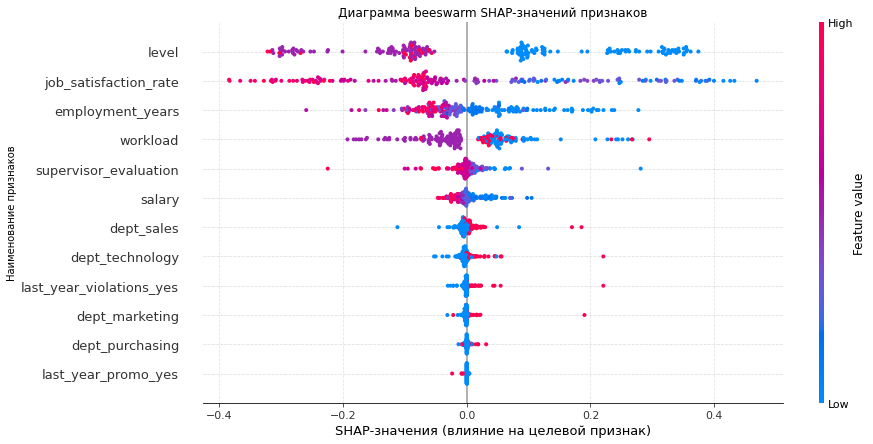

In [116]:
shap.plots.beeswarm(shap_values, order=shap_values.abs.mean(0), max_display=None, plot_size=(13,7), show=False)
plt.ylabel('Наименование признаков')
plt.xlabel('SHAP-значения (влияние на целевой признак)')
plt.title('Диаграмма beeswarm SHAP-значений признаков')
plt.show()

Отобразим общий вклад признаков в прогнозы модели в виде столбчатой диаграммы:

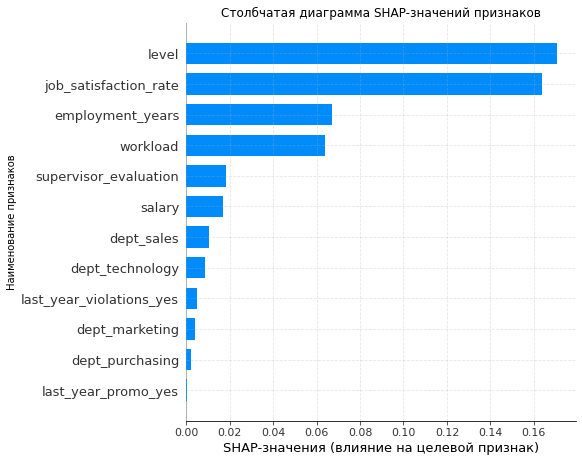

In [117]:
shap.summary_plot(shap_values, plot_type='bar', show=False)
plt.ylabel('Наименование признаков')
plt.xlabel('SHAP-значения (влияние на целевой признак)')
plt.title('Столбчатая диаграмма SHAP-значений признаков')
plt.show()

**Выводы**:
* Признаки, которые сильнее всего влияют на целевой признак:

Признак|Описание
-|:-
level|уровень занимаемой должности
job_satisfaction_rate|уровень удовлетворённости сотрудника работой в компании
employment_years|длительность работы в компании (в годах)
workload|уровень загруженности сотрудника

* С помощью beeswarm диаграммы наглядно видно, что вероятность увольнения сотрудника тем ниже, чем:
  * выше уровень занимаемой должности
  * выше уровень удовлетворённости сотрудника работой
  * дольше длительность работы в компании
  * выше уровень загруженности

[Вернуться к оглавлению](#point0)

## Общий вывод

Для данных предоставленных аналитиками компании «Работа с заботой», содержащих информацию с характеристиками сотрудников компании с поставленными целями
* построения модели МО, которая предскажет уровень удовлетворённости сотрудника
* построения модели МО, которая предскажет увольнение сотрудника из компании
было проведено исследование, в рамках которого:
1. Решена задача регрессии: предсказание уровня удовлетворённости сотрудника  
  1.1 Произведено предварительное изучение  набора данных
  * проверена корректность и соответствие предоставленных данных заявленным заказчиком
  1.2. Проведена предварительная обработка данных  
  1.3. Проведен исследовательский анализ данных  
  * исследовано распределение значений числовых и категориальных признаков
  1.4. Проведен корреляционный анализ
  * рассчитаны коэффициенты корреляции Фи ($\phi_k$) для признаков датасета
  * данные проверены на наличие мультиколлинеарности
  * определены признаки с низкой степенью корреляции
  1.5 Собран пайплайн подготовки данных
  * Категориальный номинальный признак, а также категориальные бинарные признаки закодированы при помощи OneHotEncoder.
  * Категориальные ранговые признаки закодированы при помощи OrdinalEncoder.
  * Заполнение пропусков категориальных данных осуществляется с помощью SimpleImputer.
  * К числовым признакам применено масштабирование данных StandardScaler и MinMaxScaler.
  1.6 Произведено обучение моделей  
  1.6.1  Сформирован пайплайн обучения моделей: 
  * исследовались модели DecisionTreeRegressor, LinearRegression, SVR
  * метрика оценки качества моделей - SMAPE.
  1.6.2  Произведен поиск лучшей модели. Лучший результат показала модель SVR
  1.6.3  Качество модели оценено на тестовых данных. Метрика SMAPE лучшей модели на тренировочной выборке: 13.52, что соответствует критерию успеха (SMAPE ≤ 15).    
  1.6.4  Модель проверена на адекватность
2.  Решена задача классификации: предсказание увольнения сотрудника из компании  
  2.1 Произведено предварительное изучение  набора данных
  * проверена корректность и соответствие предоставленных данных заявленным заказчиком
  2.2. Проведена предварительная обработка данных  
  2.3. Проведен исследовательский анализ данных
  * исследовано распределение значений числовых и категориальных признаков
  * составлен портрет типичного «уволившегося сотрудника». Установлено, что уволившийся сотрудник как правило:
     * может работать в любом отделе 
     * имеет уровень занимаемой должности 'junior'
     * имеет низкий уровень загруженности
     * работает в компании первый год
     * скорее всего не получал повышение
     * скорее всего нарушал трудовой договор
     * имеет низкую оценку качества работы
     * имеет среднюю зарплату не сильно отличающуюся от других (в районе 22700)
  * произведен анализ взаимозависимости признаков "уровень удовлетворённости сотрудника работой" и "увольнение".
     * На основе графического анализа, а также сравнения средних значений уровня удовлетворённости сотрудников работой было заключено, что этот признак влияет на увольнение.
     * На основе данного заключения для обучающих признаков второй задачи был добавлен признак job_satisfaction_rate, который был получен с помощью прогноза лучшей модели найденой при решении первой задачи
  2.4. Проведен корреляционный анализ
  * рассчитаны коэффициенты корреляции Фи ($\phi_k$) для признаков датасета
  * данные проверены на наличие мультиколлинеарности
  * определены признаки с низкой степенью корреляции
  2.5 Собран пайплайн подготовки данных
  2.6 Произведено обучение моделей:
  2.6.1 Сформирован пайплайн обучения моделей. 
  * Исследовались модели KNeighborsClassifier, DecisionTreeClassifier, LogisticRegression, SVC. 
  * В качестве метрики качества ROC-AUC.
  2.6.2 Произведен поиск лучшей модели. Лучший результат показала модель SVC
  2.6.3 Метрика ROC-AUC лучшей модели на тренировочной выборке: 0.93, что соответствует критерию успеха (ROC-AUC ≥ 0.91).
  2.6.4  Модель проверена на адекватность
  2.7  Проведен анализ важности признаков. Признаки которые больше всего влияют на целевой признак:
  * уровень занимаемой должности
  * уровень удовлетворённости сотрудника работой в компании
  * длительность работы в компании (в годах)
  * уровень загруженности сотрудника

На основании полученных результатов можно сделать следующие выводы:

**Уровень удовлетворённости сотрудника работой в компании**.
* Компания имеет преимущественно положительный климат в плане удовлетворенности сотрудников, с большинством работников, которые находятся в среднем или выше среднего диапазоне удовлетворенности. 
* Существуют, однако, области для улучшения, особенно на концах шкалы удовлетворенности, где некоторые сотрудники чувствуют себя либо крайне неудовлетворенными, либо полностью удовлетворенными. Это может указывать на необходимость более детального анализа условий труда, управления и других факторов, влияющих на уровень удовлетворенности сотрудников.

**Количество увольнений**. 
* Значительное большинство сотрудников (72%) не уволилось, что может говорить о стабильности в компании, хорошем удержании персонала или удовлетворенности сотрудников условиями работы, корпоративной культурой, возможностями карьерного роста и т.д.
* В то же время, около 28% сотрудников уволились, что указывает на определенный уровень текучести кадров. Хотя эта цифра не является чрезмерно высокой, она подчеркивает, что есть потенциальные проблемы, которые могут приводить к уходу сотрудников. Это может быть связано с разными факторами, такими как неудовлетворенность работой, лучшие предложения от других работодателей, личные причины или проблемы в управлении персоналом.
* С учетом того, что почти треть сотрудников уволилась, подтверждается актуальность исследования и поиск возможностей улучшения ситуации.

**Использование системы оценок качества работы сотрудника в качестве индикатора удовлетворенности работой**.
Если качество работы положительно коррелирует с удовлетворенностью, компания может использовать это знание для мотивации сотрудников через системы поощрений, бонусов или других форм признания за хорошую работу. 
Низкие оценки качества работы могут служить сигналом для дополнительного обучения или коучинга, что в долгосрочной перспективе может повысить удовлетворенность сотрудников, улучшив их компетенции и, следовательно, оценки их работы.

**Влияние нарушения трудового договора на удовлетворенность и увольнение**.
Если нарушение договора связано с низкой удовлетворенностью, это может указывать на проблемы в корпоративной культуре или управлении, которые нужно решать. Обучение менеджеров, усовершенствование процессов управления или пересмотр условий труда могут помочь снизить количество нарушений и повысить удовлетворенность.
Анализ причин нарушения договора может помочь в разработке программ поддержки сотрудников, чтобы предотвратить негативные последствия, которые могут привести к увольнению.

**Влияние уровня занимаемой должности на увольнение**. Обнаружение тенденции, когда среди уволившихся преобладают сотрудники уровня junior, указывает на необходимость специфических мер для улучшения удержания персонала на этом уровне. Вот пример рекомендаций:
* Улучшение процесса адаптации (онбординга)
* Обратная связь и оценка
* Гибкость работы
* Менторство и поддержка

**Связь длительности работы в компании с вероятностью увольнения** .
Длительное пребывание в компании, если оно коррелирует с удовлетворенностью, подчеркивает важность возможностей для карьерного роста и признания долгосрочного вклада сотрудников. Программы развития карьеры, регулярные повышения по службе или ротация должностей могут быть эффективны для поддержания высокого уровня удовлетворенности.
Для новых сотрудников, которые могут иметь более низкий уровень удовлетворенности из-за адаптации, можно улучшить процессы онбординга и создать условия для быстрой интеграции в команду, что в перспективе может повлиять на долгосрочное удовлетворение работой.

[Вернуться к оглавлению](#point0)